# Text lda decomposition and sentiment analysis

## Old Work

In [148]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from tqdm import tqdm_notebook
import seaborn
from datetime import datetime
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Load data from disk
tweets = pd.read_csv('/Users/jitins_lab/Documents/experiment/data/customer_support/twcs.csv')

In [ ]:
# Get customer requests and company responses 
# (from https://www.kaggle.com/soaxelbrooke/first-inbound-and-response-tweets/code)
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

inbounds_and_outbounds = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

# Enable progress reporting on `df.apply` calls
# tqdm_notebook().pandas()

In [3]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

print(sentiment_for('I just love it!'))


0.6696


In [ ]:
# Analyze sentiment of inbound customer support requests
inbounds_and_outbounds['inbound_sentiment'] = inbounds_and_outbounds['text_x'].apply(lambda x: sentiment_for(x))

0.6696


In [ ]:
inbounds_and_outbounds.head()

In [7]:
author_grouped = inbounds_and_outbounds.groupby('author_id_y')

In [8]:
top_support_providers = set(author_grouped.agg('count')
                                .sort_values(['tweet_id_x'], ascending=[0])
                                .index[:20]
                                .values)

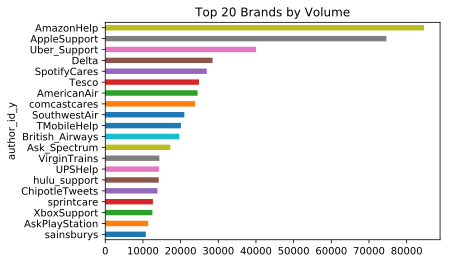

In [9]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .tweet_id_x.count() \
    .sort_values() \
    .plot('barh', title='Top 20 Brands by Volume')

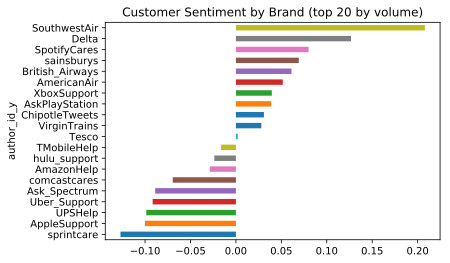

In [10]:
inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y.isin(top_support_providers)] \
    .groupby('author_id_y') \
    .inbound_sentiment.mean() \
    .sort_values() \
    .plot('barh', title='Customer Sentiment by Brand (top 20 by volume)')

In [11]:
inbounds_and_outbounds['created_at_x'] = pd.to_datetime(inbounds_and_outbounds.created_at_x)

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


Text(0,0.5,'Customer Sentiment')

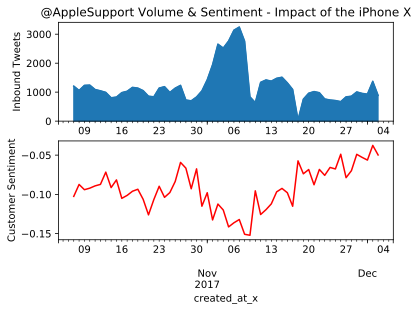

In [12]:
apple_tweets = inbounds_and_outbounds \
    .loc[inbounds_and_outbounds.author_id_y == 'AppleSupport'] \
    .loc[inbounds_and_outbounds.created_at_x > datetime(2017, 10, 7)]
plt.subplot(2, 1, 1)

ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='created_at_x', freq='24h')) \
    .count() \
    .tweet_id_x.sort_index() \
    .plot(title='@AppleSupport Volume & Sentiment - Impact of the iPhone X', kind='area')
ax.set_ylabel('Inbound Tweets')
    

plt.subplot(2, 1, 2)
ax = apple_tweets \
    .groupby(pd.TimeGrouper(key='created_at_x', freq='24h')) \
    .inbound_sentiment.mean() \
    .sort_index() \
    .plot(color='red')
ax.set_ylabel('Customer Sentiment')


In [13]:
inbounds_and_outbounds.author_id_x.value_counts()

116421    103
317609     76
188231     75
121239     58
122255     56
121325     55
118423     49
531342     47
119784     39
134709     38
133091     37
130848     37
131770     37
130560     36
152471     34
125464     34
407042     32
127850     31
217320     30
126889     29
137449     29
135984     29
145112     28
146946     28
150811     28
116339     28
156054     28
162125     28
130842     27
164814     27
         ... 
361664      1
604888      1
687517      1
736349      1
638469      1
153814      1
695520      1
433156      1
618724      1
379620      1
549515      1
265893      1
184066      1
358711      1
124574      1
794567      1
482627      1
645367      1
410563      1
429526      1
199427      1
719559      1
773293      1
757661      1
382561      1
345184      1
473500      1
294273      1
563159      1
213647      1
Name: author_id_x, Length: 597075, dtype: int64

In [6]:
tweets.author_id.value_counts()[:20]

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
SouthwestAir        28977
VirginTrains        27817
Ask_Spectrum        25860
XboxSupport         24557
sprintcare          22381
hulu_support        21872
sainsburys          19466
GWRHelp             19364
AskPlayStation      19098
ChipotleTweets      18749
Name: author_id, dtype: int64

In [8]:
sum(tweets.author_id.value_counts()[:30])/tweets.shape[0]

0.34536274963777314

In [19]:
selected_tweets = tweets.loc[tweets.author_id.isin(tweets.author_id.value_counts()[5:10].index.tolist()),
                             ['author_id','created_at','text']]

In [20]:
selected_tweets.head()

,author_id,created_at,text
480,Tesco,Tue Oct 31 22:18:58 +0000 2017,"@115881 Hi Cade, thanks so much for sending th..."
482,Tesco,Tue Oct 31 19:47:00 +0000 2017,"@115881 Hi Cade, what was my colleagues name? ..."
558,British_Airways,Tue Oct 31 22:28:36 +0000 2017,@115892 caused. We're unable to offer a compli...
560,British_Airways,Wed Nov 01 09:35:44 +0000 2017,@115892 Please can you DM us your booking refe...
565,British_Airways,Tue Oct 31 22:26:11 +0000 2017,@115893 email address and contact telephone nu...


In [21]:
# cleaning @idds from data
def remove_ids_hashtags_urls(x):
    s = []
    for i in x.split():
        if (not i.startswith('@')) and (not i.startswith('#')) and (not i.startswith('http')):
            s.append(i.lower())
    return ' '.join(s)

selected_tweets['text'] = selected_tweets['text'].apply(lambda x: remove_ids_hashtags_urls(x))


In [22]:
selected_tweets.head()

,author_id,created_at,text
480,Tesco,Tue Oct 31 22:18:58 +0000 2017,"hi cade, thanks so much for sending that over...."
482,Tesco,Tue Oct 31 19:47:00 +0000 2017,"hi cade, what was my colleagues name? can you ..."
558,British_Airways,Tue Oct 31 22:28:36 +0000 2017,caused. we're unable to offer a complimentary ...
560,British_Airways,Wed Nov 01 09:35:44 +0000 2017,"please can you dm us your booking reference, e..."
565,British_Airways,Tue Oct 31 22:26:11 +0000 2017,email address and contact telephone number. we...


In [23]:
selected_tweets['created_at'] = pd.to_datetime(selected_tweets.created_at)

In [24]:
selected_tweets.head()

,author_id,created_at,text
480,Tesco,2017-10-31 22:18:58,"hi cade, thanks so much for sending that over...."
482,Tesco,2017-10-31 19:47:00,"hi cade, what was my colleagues name? can you ..."
558,British_Airways,2017-10-31 22:28:36,caused. we're unable to offer a complimentary ...
560,British_Airways,2017-11-01 09:35:44,"please can you dm us your booking reference, e..."
565,British_Airways,2017-10-31 22:26:11,email address and contact telephone number. we...


# Text Analysis

In [25]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.manifold import TSNE
import numpy as np

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def clean_text(text):
    text = "".join([char if char.isalpha() else " " for char in text.lower()]).split()
    #text = [ps.stem(word) for word in text]
    #text = " ".join([word for word in text if (word not in my_stopwords and len(word) > 2)])
    text = " ".join([word for word in text if (len(word) > 2)])
    return text.lower()

In [29]:
%time selected_tweets['clean_text'] = selected_tweets['text'].apply(clean_text)

CPU times: user 2.74 s, sys: 20 ms, total: 2.76 s
Wall time: 2.76 s


In [43]:
X, y = selected_tweets['clean_text'], selected_tweets['author_id']
cvectorizer = CountVectorizer(min_df=5, stop_words='english')
#tv = TfidfVectorizer(min_df=0.001, max_df= 1.0, use_idf=True,ngram_range=(1,3))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
cvz = cvectorizer.fit_transform(X_val)#.toarray()
X_val = cvectorizer.transform(X_val)#.toarray()
vocab = cvectorizer.get_feature_names()
print(len(vocab))

9793


In [44]:
cvz

<194217x9793 sparse matrix of type '<class 'numpy.int64'>'
	with 1423492 stored elements in Compressed Sparse Row format>

In [45]:
X_val.shape,X_train.shape

((194217, 9793), (776865,))

In [48]:
import lda

# train an LDA model
lda_model = lda.LDA(n_topics=25, n_iter=500)
X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 194217
INFO:lda:vocab_size: 9793
INFO:lda:n_words: 1452687
INFO:lda:n_topics: 25
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -16533387
INFO:lda:<10> log likelihood: -12301850
INFO:lda:<20> log likelihood: -11050660
INFO:lda:<30> log likelihood: -10694728
INFO:lda:<40> log likelihood: -10533998
INFO:lda:<50> log likelihood: -10445852
INFO:lda:<60> log likelihood: -10402914
INFO:lda:<70> log likelihood: -10371137
INFO:lda:<80> log likelihood: -10350611
INFO:lda:<90> log likelihood: -10328854
INFO:lda:<100> log likelihood: -10311176
INFO:lda:<110> log likelihood: -10299110
INFO:lda:<120> log likelihood: -10293500
INFO:lda:<130> log likelihood: -10285996
INFO:lda:<140> log likelihood: -10278781
INFO:lda:<150> log likelihood: -10272066
INFO:lda:<160> log likelihood: -10267867
INFO:lda:<170> log likelihood: -10268511
INFO:lda:<180> log likelihood: -10265893
INFO:lda:<190> log likelihood: -10263620
INFO:lda:<200> log likelihood: -10264945
INFO:lda:<210> log likelih

In [49]:
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
X_topics = X_topics[_idx]

In [50]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 85676 samples in 1.348s...
[t-SNE] Computed neighbors for 85676 samples in 206.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 85676
[t-SNE] Computed conditional probabilities for sample 2000 / 85676
[t-SNE] Computed conditional probabilities for sample 3000 / 85676
[t-SNE] Computed conditional probabilities for sample 4000 / 85676
[t-SNE] Computed conditional probabilities for sample 5000 / 85676
[t-SNE] Computed conditional probabilities for sample 6000 / 85676
[t-SNE] Computed conditional probabilities for sample 7000 / 85676
[t-SNE] Computed conditional probabilities for sample 8000 / 85676
[t-SNE] Computed conditional probabilities for sample 9000 / 85676
[t-SNE] Computed conditional probabilities for sample 10000 / 85676
[t-SNE] Computed conditional probabilities for sample 11000 / 85676
[t-SNE] Computed conditional probabilities for sample 12000 / 85676
[t-SNE] Computed conditional probabilities for s

In [51]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

In [52]:
_lda_keys = []
for i in range(X_topics.shape[0]):
    _lda_keys +=  X_topics[i].argmax(),

topic_summaries = []
topic_word = lda_model.topic_word_  # all topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
    topic_summaries.append(' '.join(topic_words)) # append!

In [53]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    "#1f7874", "#aec777", "#fffeee", "#ffbbbb", "#2caaac",
    "#98dfaa", "#d66666", "#ff9996", "#9499bd", "#c55445",
    "#8c5467", "#c49ccc", "#e33332", "#f77dd2", "#7ffeef",
    "#c7c9d9", "#bc4321", "#dbbbed", "#17bbef", "#9eeea5",
    "#1fc7bb", "#ae8888", "#ffebbe", "#aebf18", "#2caaac",
    "#981f2a", "#d66ee7", "#ff9996", "#91eebd", "#c555d5",
    "#8c321b", "#c4444a", "#eeefff", "#fbbdd2", "#77777f",
    "#c7b7b7", "#bc1222", "#dbae8d", "#17cccf", "#9eddd5",
    "#c7f7f7", "#bace22", "#db818d", "#17bfff", "#9eaaa5"
])

In [54]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    "#1f7874", "#aec777", "#fffeee", "#ffbbbb", "#2caaac",
    "#98dfaa", "#d66666", "#ff9996", "#9499bd", "#c55445",
    "#8c5467", "#c49ccc", "#e33332", "#f77dd2", "#7ffeef",
    "#c7c9d9", "#bc4321", "#dbbbed", "#17bbef", "#9eeea5",
    "#1fc7bb", "#ae8888", "#ffebbe", "#aebf18", "#2caaac",
    "#981f2a", "#d66ee7", "#ff9996", "#91eebd", "#c555d5",
    "#8c321b", "#c4444a", "#eeefff", "#fbbdd2", "#77777f",
    "#c7b7b7", "#bc1222", "#dbae8d", "#17cccf", "#9eddd5",
    "#c7f7f7", "#bace22", "#db818d", "#17bfff", "#9eaaa5"
])

title = '{} groups LDA viz'.format(33)
num_example = len(X_topics)

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.circle(x=tsne_lda[:,0], y=tsne_lda[:, 1],
                 color=colormap[_lda_keys][:num_example]
                 )

GlyphRenderer(id='5db348bc-8bd6-4706-ae99-3cbe0d44e7c1', ...)

In [55]:
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
    if not np.isnan(topic_coord).any():
        break
    topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
    plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

# save the plot
save(plot_lda, '{}.html'.format(title))

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/jitins_lab/Documents/experiment/notebooks/33 groups LDA viz.html'

In [61]:
topic_summaries

['know let need help feel',
 'ios let version help update',
 'sorry hear experience confirmation inconvenience',
 'thanks great glad hope hear',
 'details information provide don order',
 'que por para hola pedido',
 'sorry order delivery date time',
 'help send team note sorry',
 'team check email support thanks',
 'try let steps device know',
 'help like look let thanks',
 'message send help direct assist',
 'store sorry thanks did link',
 'flight booking check change need',
 'feedback team thanks sure thank',
 'issue working sorry soon apologies',
 'app check hey able info',
 'available check hey updates stay',
 'email address look account send',
 'service apologies sorry train delay',
 'number account phone address service',
 'want send make help sure',
 'number regards sorry concern issue',
 'vous code details votre date',
 'look number like link phone']

In [62]:
X_topics = lda_model.fit_transform(cvz)
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
X_topics_ = X_topics[_idx]

INFO:lda:n_documents: 194217
INFO:lda:vocab_size: 9793
INFO:lda:n_words: 1452687
INFO:lda:n_topics: 25
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -16533387
INFO:lda:<10> log likelihood: -12310720
INFO:lda:<20> log likelihood: -10980736
INFO:lda:<30> log likelihood: -10652787
INFO:lda:<40> log likelihood: -10522956
INFO:lda:<50> log likelihood: -10456496
INFO:lda:<60> log likelihood: -10413198
INFO:lda:<70> log likelihood: -10379749
INFO:lda:<80> log likelihood: -10359375
INFO:lda:<90> log likelihood: -10340139
INFO:lda:<100> log likelihood: -10321050
INFO:lda:<110> log likelihood: -10306293
INFO:lda:<120> log likelihood: -10298450
INFO:lda:<130> log likelihood: -10294844
INFO:lda:<140> log likelihood: -10287870
INFO:lda:<150> log likelihood: -10287169
INFO:lda:<160> log likelihood: -10280480
INFO:lda:<170> log likelihood: -10275792
INFO:lda:<180> log likelihood: -10272361
INFO:lda:<190> log likelihood: -10268107
INFO:lda:<200> log likelihood: -10268488
INFO:lda:<210> log likelih

In [70]:
X_topics[3,]

array([ 0.01818182,  0.01818182,  0.01818182,  0.01818182,  0.01818182,
        0.01818182,  0.01818182,  0.01818182,  0.01818182,  0.01818182,
        0.56363636,  0.01818182,  0.01818182,  0.01818182,  0.01818182,
        0.01818182,  0.01818182,  0.01818182,  0.01818182,  0.01818182,
        0.01818182,  0.01818182,  0.01818182,  0.01818182,  0.01818182])

# Redoing LDA modelling with gensim

In [1]:
# basic imports
import pandas as pd
import numpy as np

# from tqdm import tqdm_notebook
from datetime import datetime
import time 
import re

#plotting
from matplotlib import pyplot as plt
import seaborn

# DS imports
from sklearn.base import BaseEstimator,TransformerMixin

#nlp imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df


In [3]:
# Instantiate sentiment analyzer from NLTK, make helper function
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_for(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

print(sentiment_for('I just love it!'))


0.6696


In [4]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.manifold import TSNE


In [5]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def clean_text(text):
    text = "".join([char if char.isalpha() else " " for char in text.lower()]).split()
    #text = [ps.stem(word) for word in text]
    #text = " ".join([word for word in text if (word not in my_stopwords and len(word) > 2)])
    # text = " ".join([word for word in text if (len(word) > 2)])
    text = " ".join(text)
    return text

In [6]:
# Load data from disk
tweets = pd.read_csv('/Users/jitins_lab/Documents/experiment/data/customer_support/twcs.csv')

In [7]:
tweets.author_id.value_counts()[5:10].index.tolist()

['Tesco', 'AmericanAir', 'TMobileHelp', 'comcastcares', 'British_Airways']

In [8]:
selected_tweets = tweets.loc[tweets.author_id.isin(tweets.author_id.value_counts()[5:10].index.tolist()),
                             ['author_id','created_at','text']]

In [9]:
# cleaning @idds from data
def remove_ids_hashtags_urls(x):
    s = []
    for i in x.split():
        if (not i.startswith('@')) and (not i.startswith('#')) and (not i.startswith('http')):
            s.append(i.lower())
    return ' '.join(s)



In [10]:
%time selected_tweets['created_at'] = pd.to_datetime(selected_tweets.created_at)

CPU times: user 30.6 s, sys: 77.7 ms, total: 30.6 s
Wall time: 30.7 s


In [75]:
%time selected_tweets['created_date'] = selected_tweets['created_at'].dt.date

CPU times: user 1.01 s, sys: 17.3 ms, total: 1.02 s
Wall time: 1.02 s


In [110]:
%time selected_tweets['created_week'] = selected_tweets['created_at'].dt.week

CPU times: user 12.9 ms, sys: 2.4 ms, total: 15.3 ms
Wall time: 14.1 ms


In [11]:
%time selected_tweets['clean_text'] = selected_tweets['text'].apply(lambda x: remove_ids_hashtags_urls(x))

CPU times: user 2.69 s, sys: 23.3 ms, total: 2.72 s
Wall time: 2.72 s


In [12]:
%time selected_tweets['clean_text'] = selected_tweets['clean_text'].apply(clean_text)

CPU times: user 2.35 s, sys: 25.8 ms, total: 2.38 s
Wall time: 2.38 s


In [13]:
# Analyze sentiment of inbound customer support requests
%time selected_tweets['sentiment'] = selected_tweets['clean_text'].apply(lambda x: sentiment_for(x))

CPU times: user 47.6 s, sys: 78 ms, total: 47.7 s
Wall time: 47.8 s


In [14]:
selected_tweets.head()

,author_id,created_at,text,clean_text,sentiment
480,Tesco,2017-10-31 22:18:58,"@115881 Hi Cade, thanks so much for sending th...",hi cade thanks so much for sending that over i...,0.4404
482,Tesco,2017-10-31 19:47:00,"@115881 Hi Cade, what was my colleagues name? ...",hi cade what was my colleagues name can you gi...,0.0000
558,British_Airways,2017-10-31 22:28:36,@115892 caused. We're unable to offer a compli...,caused we re unable to offer a complimentary u...,0.6597
560,British_Airways,2017-11-01 09:35:44,@115892 Please can you DM us your booking refe...,please can you dm us your booking reference em...,0.6705
565,British_Airways,2017-10-31 22:26:11,@115893 email address and contact telephone nu...,email address and contact telephone number we ...,-0.2263


In [15]:
selected_tweets.shape

(172046, 5)

In [15]:
# import logging
# import pyLDAvis.gensim
import json
# import warnings
# warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.tfidfmodel import TfidfModel
import lda

In [17]:
# texts = selected_tweets['clean_text'].apply(lambda x: x.split()).values

In [18]:
# texts

array([ ['hi', 'cade', 'thanks', 'so', 'much', 'for', 'sending', 'that', 'over', 'i', 'have', 'sent', 'an', 'email', 'to', 'the', 'store', 'manager', 'to', 'look', 'into', 'this', 'for', 'you'],
       ['hi', 'cade', 'what', 'was', 'my', 'colleagues', 'name', 'can', 'you', 'give', 'a', 'description', 'when', 'were', 'you', 'in', 'our', 'store', 'nick'],
       ['caused', 'we', 're', 'unable', 'to', 'offer', 'a', 'complimentary', 'upgrade', 'however', 'we', 'can', 'quote', 'an', 'upgrade', 'if', 'you', 'would', 'like', 'us', 'to', 'jane'],
       ...,
       ['that', 's', 'weird', 'let', 's', 'check', 'that', 'out', 'dm', 'us', 'we', 're', 'here', 'to', 'help', 'joano'],
       ['hi', 'andy', 'when', 'you', 'return', 'dm', 'us', 'your', 'booking', 'reference', 'full', 'name', 'email', 'address', 'and', 'contact', 'number', 'we', 'll', 'take', 'a', 'look', 'for', 'you', 'davina'],
       ['it', 'was', 'a', 'very', 'chilly', 'morning', 'simon', 'i', 'm', 'sure', 'the', 'ground', 'crew', '

In [19]:
# %time
# texts = selected_tweets['clean_text'].apply(lambda x: x.split()).values
# dictionary = Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [30]:
# %time ldaModel = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=250, num_topics=5, workers =8)

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/gensim/models/ldamodel.py:497: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/gensim/models/ldamodel.py:497: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/gensim/models/ldamodel.py:497: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/gensim/models/ldamodel.py:497: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/gensim/models/ldamodel.py:497: RuntimeWarning: overflow encountered in exp
  expElogthetad = np.exp(Elogthetad)


CPU times: user 2min 1s, sys: 25.4 s, total: 2min 26s
Wall time: 3min 17s


In [27]:
%time
X = selected_tweets['clean_text']
# # X, y = selected_tweets['clean_text'], selected_tweets['author_id']
cvectorizer = CountVectorizer(min_df=5, stop_words='english')

# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
cvz = cvectorizer.fit_transform(X)#.toarray()
# # X_val = cvectorizer.transform(X_val)#.toarray()
vocab = cvectorizer.get_feature_names()
print(len(vocab))

# tested using tfidf matrix but failed
# tv = TfidfVectorizer(min_df=0.001, max_df= 1.0, use_idf=False, ngram_range=(1,2))
# tv_x = tv.fit_transform(X)
# vocab = tv.get_feature_names()
# print(len(vocab))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
8026


In [28]:
# %time
# lda_model = lda.LDA(n_topics=25, n_iter=500)
# X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 172046
INFO:lda:vocab_size: 8026
INFO:lda:n_words: 1544107
INFO:lda:n_topics: 25
INFO:lda:n_iter: 500


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


INFO:lda:<0> log likelihood: -17085021
INFO:lda:<10> log likelihood: -12601796
INFO:lda:<20> log likelihood: -11265847
INFO:lda:<30> log likelihood: -10940170
INFO:lda:<40> log likelihood: -10804113
INFO:lda:<50> log likelihood: -10734072
INFO:lda:<60> log likelihood: -10697601
INFO:lda:<70> log likelihood: -10675162
INFO:lda:<80> log likelihood: -10661592
INFO:lda:<90> log likelihood: -10647792
INFO:lda:<100> log likelihood: -10636749
INFO:lda:<110> log likelihood: -10631921
INFO:lda:<120> log likelihood: -10629266
INFO:lda:<130> log likelihood: -10623262
INFO:lda:<140> log likelihood: -10622691
INFO:lda:<150> log likelihood: -10615914
INFO:lda:<160> log likelihood: -10616808
INFO:lda:<170> log likelihood: -10615675
INFO:lda:<180> log likelihood: -10615548
INFO:lda:<190> log likelihood: -10614136
INFO:lda:<200> log likelihood: -10606540
INFO:lda:<210> log likelihood: -10605358
INFO:lda:<220> log likelihood: -10605136
INFO:lda:<230> log likelihood: -10607085
INFO:lda:<240> log likeliho

In [36]:
# X_topics[1,],X_topics.shape

(array([ 0.01176471,  0.12941176,  0.6       ,  0.01176471,  0.01176471,
         0.01176471,  0.01176471,  0.01176471,  0.01176471,  0.01176471,
         0.01176471,  0.01176471,  0.01176471,  0.01176471,  0.01176471,
         0.01176471,  0.01176471,  0.01176471,  0.01176471,  0.01176471,
         0.01176471,  0.01176471,  0.01176471,  0.01176471,  0.01176471]),
 (172046, 25))

In [34]:
# threshold = 0.5
# _idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
# # X_topics = X_topics[_idx]
# np.min(np.amax(X_topics,axis=1))

0.039999999999999994

In [38]:
# X_topics_old = X_topics
# X_topics = X_topics[_idx]
# X_topics.shape

(81841, 25)

In [40]:
# lda_model.topic_word_.shape

(25, 8026)

In [44]:
# n_top_words = 5 #
# _lda_keys = []
# for i in range(X_topics.shape[0]):
#     _lda_keys +=  X_topics[i].argmax(),

# topic_summaries = []
# topic_word = lda_model.topic_word_  # all topic words
# vocab = cvectorizer.get_feature_names()
# for i, topic_dist in enumerate(topic_word):
#     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1].tolist() # get!
#     # topic_summaries.append(' '.join(topic_words)) # append!
#     topic_summaries.append(topic_words) # append!

In [46]:
# topic_summaries

[['thanks', 'love', 'forward', 'board', 'great'],
 ['like', 'details', 'log', 'refund', 'address'],
 ['hi', 'store', 'ty', 'thanks', 'sorry'],
 ['hi', 'sorry', 'having', 'issues', 'issue'],
 ['hi', 'contact', 'need', 'link', 'team'],
 ['address', 'code', 'store', 'barcode', 'dm'],
 ['seat', 'change', 'seats', 'offer', 'ticket'],
 ['dm', 'number', 'booking', 'address', 'email'],
 ['dm', 'send', 'account', 'help', 'info'],
 ['feedback', 'll', 'team', 'sorry', 'pass'],
 ['dm', 'send', 'let', 'make', 'sure'],
 ['want', 'dm', 'experience', 'help', 'way'],
 ['sorry', 'hi', 'inconvenience', 'flight', 'caused'],
 ['dm', 'address', 'hi', 'order', 'thanks'],
 ['dm', 'll', 'want', 'love', 'send'],
 ['dm', 'number', 'phone', 'address', 'account'],
 ['dm', 'record', 'locator', 'look', 'll'],
 ['team', 'airport', 'check', 'sorry', 'll'],
 ['ll', 'soon', 'time', 'possible', 'sorry'],
 ['new', 'check', 'customers', 'available', 'offer'],
 ['dm', 'address', 'help', 'phone', 'like'],
 ['hope', 'great', 

In [293]:
def lda_modeler(vector_space, num_topics, iterations,num_top_words = 5,threshold = 0.5):
    
    print('Lda model on vector space of {} the topics {} for iterations {}'.format(vector_space.shape,num_topics,iterations))
    
    lda_model = lda.LDA(n_topics=num_topics, n_iter=iterations)
    X_topics = lda_model.fit_transform(vector_space)
    X_topics_ = X_topics
    _idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
    X_topics = X_topics[_idx]
    
    print('After threshold: {} cutoffs, we have topic space of {}'.format(threshold,X_topics.shape))
    
    _lda_keys = []
    for i in range(X_topics.shape[0]):
        _lda_keys +=  X_topics_[i].argmax(),

    topic_summaries = []
    topic_word = lda_model.topic_word_  # all topic words
    vocab = cvectorizer.get_feature_names()
    for i, topic_dist in enumerate(topic_word):
        topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(num_top_words + 1):-1].tolist() # get!
        # topic_summaries.append(' '.join(topic_words)) # append!
        topic_summaries.append(topic_words) # append!
    print('Selected top {} words. The topic word are listed below!'.format(num_top_words))
    print(topic_summaries)
    
    return topic_summaries, lda_model, _lda_keys, X_topics_, X_topics
    

In [51]:
_ = lda_modeler(cvz,20,50,10)

INFO:lda:n_documents: 172046
INFO:lda:vocab_size: 8026
INFO:lda:n_words: 1544107
INFO:lda:n_topics: 20
INFO:lda:n_iter: 50


Lda model on vector space of (172046, 8026) the topics 20 for iterations 50


INFO:lda:<0> log likelihood: -16879958
INFO:lda:<10> log likelihood: -12523847
INFO:lda:<20> log likelihood: -11252648
INFO:lda:<30> log likelihood: -10891196
INFO:lda:<40> log likelihood: -10754115
INFO:lda:<49> log likelihood: -10681587


After threshold: 0.5 cutoffs, we have topic space of (99952, 20)
Selected top 10 words. The topic word are listed below!
[['hi', 'sorry', 'thanks', 'order', 'website', 'getting', 'ty', 'having', 'try', 'delivery'], ['hi', 'store', 'ty', 'sorry', 'thanks', 'colleagues', 'like', 'log', 've', 'feedback'], ['dm', 'send', 'want', 'let', 'help', 'hey', 'make', 'way', 'sure', 'check'], ['check', 'flight', 'seat', 'flights', 'ticket', 'change', 'seats', 'available', 'hi', 'need'], ['great', 'thanks', 'glad', 'hope', 'hear', 'flight', 'board', 'day', 'love', 'time'], ['dm', 'send', 'account', 'help', 'look', 'service', 'assist', 'experience', 'message', 'want'], ['address', 'dm', 'email', 'number', 'booking', 'hi', 'look', 'reference', 'contact', 'll'], ['great', 'forward', 'new', 'check', 'board', 'love', 'look', 'danking', 'll', 'looking'], ['sorry', 'll', 'time', 'soon', 'possible', 'appreciate', 'patience', 'team', 'wait', 'working'], ['address', 'email', 'dm', 'details', 'supplier', 'code'

In [29]:

def topic_coherence_gensim(corpus,dictionary,iterations,num_topics,coherence_type = 'u_mass'):
    coherences = []
    for n_t in num_topics:
        print('Iterating for {}'.format(n_t))
        t = time.time()
        ldaModel = LdaModel(corpus=corpus, id2word=dictionary, iterations=iterations, num_topics=n_t)
        coherence = CoherenceModel(model=ldaModel, corpus=corpus, dictionary=dictionary, coherence=coherence_type)
        coherences.append(coherence.get_coherence())
        print('Iteration finished with {} secs'.format(time.time()-s))
    plt.figure(figsize =(10,5))
    plt.line(num_topics,coherences)
    plt.show()
    return coherences

def topic_coherence_lda(mat_,corpus,dictionary,iterations,num_topics,coherence_type = 'u_mass'):
    coherences = []
    for n_t in num_topics:
        print('Iterating for {}'.format(n_t))
        t = time.time()
        op = lda_modeler(mat_,num_topics=n_t,iterations=iterations,num_top_words=5)
        coherence = CoherenceModel(topics = op[0], corpus=corpus, dictionary=dictionary, coherence=coherence_type)
        coherences.append(coherence.get_coherence())
        print('Iteration finished with {} secs'.format(time.time()-t))
    try:
        plt.figure(figsize =(10,5))
        plt.curve(num_topics,coherences)
        plt.show()
    except:
        pass
    return coherences

In [54]:
np.arange(1,42,2).tolist()

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41]

In [20]:
X = selected_tweets['clean_text']
cvectorizer = CountVectorizer(min_df=5, stop_words='english')
cvz = cvectorizer.fit_transform(X)#.toarray()
vocab = cvectorizer.get_feature_names()
print(len(vocab))

texts = X.apply(lambda x: x.split()).values
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

topic_coherence_lda(mat_ = cvz, corpus = corpus, dictionary = dictionary, iterations=500, num_topics=np.arange(3,42,2).tolist())


8026


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(6959 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(8894 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(11029 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(12428 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(13647 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(14803 unique tokens: ['an', 'cade', 'email', 'for', 'have']...)
INFO:gensim.corpora.dictionary:adding document #70000 to Dictionary(15871 unique tokens: ['an', 'cade', 'email', 'for', 'have

Iterating for 3
Lda model on vector space of (172046, 8026) the topics 3 for iterations 500


INFO:lda:<0> log likelihood: -12845900
INFO:lda:<10> log likelihood: -11038286
INFO:lda:<20> log likelihood: -10713717
INFO:lda:<30> log likelihood: -10371151
INFO:lda:<40> log likelihood: -10254758
INFO:lda:<50> log likelihood: -10223328
INFO:lda:<60> log likelihood: -10208453
INFO:lda:<70> log likelihood: -10199118
INFO:lda:<80> log likelihood: -10195790
INFO:lda:<90> log likelihood: -10190780
INFO:lda:<100> log likelihood: -10188941
INFO:lda:<110> log likelihood: -10188479
INFO:lda:<120> log likelihood: -10187206
INFO:lda:<130> log likelihood: -10187249
INFO:lda:<140> log likelihood: -10185877
INFO:lda:<150> log likelihood: -10184903
INFO:lda:<160> log likelihood: -10184333
INFO:lda:<170> log likelihood: -10184383
INFO:lda:<180> log likelihood: -10184246
INFO:lda:<190> log likelihood: -10183125
INFO:lda:<200> log likelihood: -10184837
INFO:lda:<210> log likelihood: -10183640
INFO:lda:<220> log likelihood: -10184641
INFO:lda:<230> log likelihood: -10184584
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (167574, 3)
Selected top 5 words. The topic word are listed below!
[['sorry', 'll', 'flight', 'team', 'hi'], ['hi', 'dm', 'address', 'sorry', 'email'], ['dm', 'send', 'help', 'look', 'account']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.

Iteration finished with 46.971800804138184 secs
Iterating for 5
Lda model on vector space of (172046, 8026) the topics 5 for iterations 500


INFO:lda:<0> log likelihood: -14200642
INFO:lda:<10> log likelihood: -11471730
INFO:lda:<20> log likelihood: -10880502
INFO:lda:<30> log likelihood: -10563417
INFO:lda:<40> log likelihood: -10402401
INFO:lda:<50> log likelihood: -10282878
INFO:lda:<60> log likelihood: -10220262
INFO:lda:<70> log likelihood: -10195119
INFO:lda:<80> log likelihood: -10181793
INFO:lda:<90> log likelihood: -10178391
INFO:lda:<100> log likelihood: -10177613
INFO:lda:<110> log likelihood: -10174602
INFO:lda:<120> log likelihood: -10175145
INFO:lda:<130> log likelihood: -10173423
INFO:lda:<140> log likelihood: -10173827
INFO:lda:<150> log likelihood: -10173703
INFO:lda:<160> log likelihood: -10172458
INFO:lda:<170> log likelihood: -10171847
INFO:lda:<180> log likelihood: -10171774
INFO:lda:<190> log likelihood: -10170241
INFO:lda:<200> log likelihood: -10170073
INFO:lda:<210> log likelihood: -10172086
INFO:lda:<220> log likelihood: -10169702
INFO:lda:<230> log likelihood: -10172107
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (162015, 5)
Selected top 5 words. The topic word are listed below!
[['hi', 'sorry', 'check', 'team', 've'], ['sorry', 'll', 'flight', 'thanks', 'team'], ['dm', 'account', 'address', 'number', 'phone'], ['dm', 'send', 'll', 'want', 'let'], ['hi', 'dm', 'address', 'email', 'sorry']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 56.71095395088196 secs
Iterating for 7
Lda model on vector space of (172046, 8026) the topics 7 for iterations 500


INFO:lda:<0> log likelihood: -15129294
INFO:lda:<10> log likelihood: -11763418
INFO:lda:<20> log likelihood: -10916449
INFO:lda:<30> log likelihood: -10579417
INFO:lda:<40> log likelihood: -10420194
INFO:lda:<50> log likelihood: -10336769
INFO:lda:<60> log likelihood: -10303940
INFO:lda:<70> log likelihood: -10288977
INFO:lda:<80> log likelihood: -10278113
INFO:lda:<90> log likelihood: -10267972
INFO:lda:<100> log likelihood: -10263531
INFO:lda:<110> log likelihood: -10261091
INFO:lda:<120> log likelihood: -10255644
INFO:lda:<130> log likelihood: -10253569
INFO:lda:<140> log likelihood: -10247742
INFO:lda:<150> log likelihood: -10245388
INFO:lda:<160> log likelihood: -10245266
INFO:lda:<170> log likelihood: -10245696
INFO:lda:<180> log likelihood: -10243174
INFO:lda:<190> log likelihood: -10243389
INFO:lda:<200> log likelihood: -10243173
INFO:lda:<210> log likelihood: -10242230
INFO:lda:<220> log likelihood: -10241369
INFO:lda:<230> log likelihood: -10241424
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (156261, 7)
Selected top 5 words. The topic word are listed below!
[['hi', 'sorry', 'know', 'thanks', 'let'], ['ll', 'great', 'thanks', 'flight', 'sorry'], ['address', 'dm', 'email', 'hi', 'details'], ['sorry', 'hi', 'flight', 'check', 'team'], ['hi', 'sorry', 'store', 'ty', 'thanks'], ['dm', 'account', 'address', 'number', 'phone'], ['dm', 'send', 'want', 'll', 'help']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 67.18920087814331 secs
Iterating for 9
Lda model on vector space of (172046, 8026) the topics 9 for iterations 500


INFO:lda:<0> log likelihood: -15778797
INFO:lda:<10> log likelihood: -11767848
INFO:lda:<20> log likelihood: -10812794
INFO:lda:<30> log likelihood: -10540331
INFO:lda:<40> log likelihood: -10442224
INFO:lda:<50> log likelihood: -10398271
INFO:lda:<60> log likelihood: -10366770
INFO:lda:<70> log likelihood: -10345529
INFO:lda:<80> log likelihood: -10328614
INFO:lda:<90> log likelihood: -10317328
INFO:lda:<100> log likelihood: -10311170
INFO:lda:<110> log likelihood: -10305227
INFO:lda:<120> log likelihood: -10299896
INFO:lda:<130> log likelihood: -10293841
INFO:lda:<140> log likelihood: -10289993
INFO:lda:<150> log likelihood: -10284791
INFO:lda:<160> log likelihood: -10282985
INFO:lda:<170> log likelihood: -10280508
INFO:lda:<180> log likelihood: -10279232
INFO:lda:<190> log likelihood: -10277147
INFO:lda:<200> log likelihood: -10275819
INFO:lda:<210> log likelihood: -10276215
INFO:lda:<220> log likelihood: -10273746
INFO:lda:<230> log likelihood: -10272743
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (151163, 9)
Selected top 5 words. The topic word are listed below!
[['thanks', 'great', 'll', 'hope', 'hear'], ['sorry', 'team', 'll', 'time', 'flight'], ['hi', 'sorry', 'store', 'ty', 'thanks'], ['dm', 'send', 'want', 'let', 'll'], ['dm', 'address', 'number', 'phone', 'account'], ['dm', 'account', 'send', 'help', 'look'], ['hi', 'sorry', 'team', 'flight', 'hear'], ['address', 'dm', 'email', 'hi', 'details'], ['dm', 'help', 'know', 'let', 'record']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 77.03618717193604 secs
Iterating for 11
Lda model on vector space of (172046, 8026) the topics 11 for iterations 500


INFO:lda:<0> log likelihood: -16185439
INFO:lda:<10> log likelihood: -12079025
INFO:lda:<20> log likelihood: -11021881
INFO:lda:<30> log likelihood: -10712649
INFO:lda:<40> log likelihood: -10579270
INFO:lda:<50> log likelihood: -10501887
INFO:lda:<60> log likelihood: -10461466
INFO:lda:<70> log likelihood: -10437839
INFO:lda:<80> log likelihood: -10425855
INFO:lda:<90> log likelihood: -10416715
INFO:lda:<100> log likelihood: -10401850
INFO:lda:<110> log likelihood: -10394923
INFO:lda:<120> log likelihood: -10391588
INFO:lda:<130> log likelihood: -10383838
INFO:lda:<140> log likelihood: -10381228
INFO:lda:<150> log likelihood: -10372100
INFO:lda:<160> log likelihood: -10369500
INFO:lda:<170> log likelihood: -10365623
INFO:lda:<180> log likelihood: -10364403
INFO:lda:<190> log likelihood: -10361324
INFO:lda:<200> log likelihood: -10360669
INFO:lda:<210> log likelihood: -10358775
INFO:lda:<220> log likelihood: -10355986
INFO:lda:<230> log likelihood: -10355292
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (145441, 11)
Selected top 5 words. The topic word are listed below!
[['address', 'dm', 'email', 'details', 'store'], ['dm', 'address', 'hi', 'email', 'number'], ['sorry', 'll', 'time', 'team', 'flight'], ['hi', 'sorry', 'store', 'ty', 'thanks'], ['dm', 'let', 'help', 'look', 'know'], ['hi', 'check', 'need', 'available', 'offer'], ['dm', 'send', 'want', 'll', 'hey'], ['dm', 'account', 'address', 'phone', 'help'], ['great', 'thanks', 'hope', 'glad', 'flight'], ['dm', 'send', 'number', 'address', 'account'], ['sorry', 'team', 'hi', 'hear', 'll']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 84.84883785247803 secs
Iterating for 13
Lda model on vector space of (172046, 8026) the topics 13 for iterations 500


INFO:lda:<0> log likelihood: -16424271
INFO:lda:<10> log likelihood: -12145432
INFO:lda:<20> log likelihood: -10985948
INFO:lda:<30> log likelihood: -10737223
INFO:lda:<40> log likelihood: -10628848
INFO:lda:<50> log likelihood: -10573266
INFO:lda:<60> log likelihood: -10528967
INFO:lda:<70> log likelihood: -10502427
INFO:lda:<80> log likelihood: -10476196
INFO:lda:<90> log likelihood: -10462165
INFO:lda:<100> log likelihood: -10450247
INFO:lda:<110> log likelihood: -10438227
INFO:lda:<120> log likelihood: -10432529
INFO:lda:<130> log likelihood: -10424825
INFO:lda:<140> log likelihood: -10420684
INFO:lda:<150> log likelihood: -10414439
INFO:lda:<160> log likelihood: -10411037
INFO:lda:<170> log likelihood: -10404668
INFO:lda:<180> log likelihood: -10401734
INFO:lda:<190> log likelihood: -10399109
INFO:lda:<200> log likelihood: -10395450
INFO:lda:<210> log likelihood: -10393656
INFO:lda:<220> log likelihood: -10386653
INFO:lda:<230> log likelihood: -10382993
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (124086, 13)
Selected top 5 words. The topic word are listed below!
[['dm', 'address', 'number', 'phone', 'account'], ['sorry', 'll', 'team', 'time', 'possible'], ['dm', 'send', 'want', 'let', 'make'], ['know', 'let', 'help', 'need', 'feel'], ['dm', 'll', 'send', 'help', 'meet'], ['hi', 'sorry', 'thanks', 'ty', 've'], ['great', 'thanks', 'hope', 'glad', 'flight'], ['hi', 'sorry', 'store', 'ty', 'like'], ['dm', 'account', 'send', 'help', 'look'], ['dm', 'record', 'locator', 'look', 'll'], ['hi', 'check', 'available', 'offer', 'need'], ['address', 'email', 'dm', 'details', 'number'], ['sorry', 'hi', 'team', 'hear', 'll']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 93.66714596748352 secs
Iterating for 15
Lda model on vector space of (172046, 8026) the topics 15 for iterations 500


INFO:lda:<0> log likelihood: -16590576
INFO:lda:<10> log likelihood: -12305121
INFO:lda:<20> log likelihood: -11128569
INFO:lda:<30> log likelihood: -10760515
INFO:lda:<40> log likelihood: -10607501
INFO:lda:<50> log likelihood: -10540597
INFO:lda:<60> log likelihood: -10498704
INFO:lda:<70> log likelihood: -10472420
INFO:lda:<80> log likelihood: -10459165
INFO:lda:<90> log likelihood: -10445563
INFO:lda:<100> log likelihood: -10440753
INFO:lda:<110> log likelihood: -10435539
INFO:lda:<120> log likelihood: -10427652
INFO:lda:<130> log likelihood: -10422777
INFO:lda:<140> log likelihood: -10419316
INFO:lda:<150> log likelihood: -10415537
INFO:lda:<160> log likelihood: -10412786
INFO:lda:<170> log likelihood: -10413712
INFO:lda:<180> log likelihood: -10410749
INFO:lda:<190> log likelihood: -10409409
INFO:lda:<200> log likelihood: -10408104
INFO:lda:<210> log likelihood: -10405219
INFO:lda:<220> log likelihood: -10403622
INFO:lda:<230> log likelihood: -10403509
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (119577, 15)
Selected top 5 words. The topic word are listed below!
[['dm', 'send', 'll', 'help', 'love'], ['ve', 'new', 'available', 'customers', 'offer'], ['feedback', 'll', 'thanks', 'sorry', 'team'], ['great', 'hope', 'thanks', 'flight', 'board'], ['sorry', 'team', 'll', 'time', 'flight'], ['dm', 'address', 'number', 'phone', 'account'], ['sorry', 'hi', 'team', 'inconvenience', 'hear'], ['address', 'dm', 'email', 'details', 'store'], ['hi', 'store', 'sorry', 'ty', 'thanks'], ['dm', 'help', 'send', 'account', 'hello'], ['know', 'let', 'help', 'need', 'feel'], ['dm', 'address', 'hi', 'email', 'number'], ['hi', 'flight', 'check', 'sorry', 'need'], ['dm', 'look', 'record', 'locator', 'll'], ['dm', 'send', 'want', 'let', 'make']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 103.34995579719543 secs
Iterating for 17
Lda model on vector space of (172046, 8026) the topics 17 for iterations 500


INFO:lda:<0> log likelihood: -16723032
INFO:lda:<10> log likelihood: -12230231
INFO:lda:<20> log likelihood: -11109953
INFO:lda:<30> log likelihood: -10808197
INFO:lda:<40> log likelihood: -10695782
INFO:lda:<50> log likelihood: -10638117
INFO:lda:<60> log likelihood: -10595072
INFO:lda:<70> log likelihood: -10568370
INFO:lda:<80> log likelihood: -10550243
INFO:lda:<90> log likelihood: -10532920
INFO:lda:<100> log likelihood: -10521417
INFO:lda:<110> log likelihood: -10510072
INFO:lda:<120> log likelihood: -10502011
INFO:lda:<130> log likelihood: -10496371
INFO:lda:<140> log likelihood: -10492209
INFO:lda:<150> log likelihood: -10486685
INFO:lda:<160> log likelihood: -10481324
INFO:lda:<170> log likelihood: -10477073
INFO:lda:<180> log likelihood: -10476640
INFO:lda:<190> log likelihood: -10474041
INFO:lda:<200> log likelihood: -10474075
INFO:lda:<210> log likelihood: -10471026
INFO:lda:<220> log likelihood: -10473481
INFO:lda:<230> log likelihood: -10473634
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (115353, 17)
Selected top 5 words. The topic word are listed below!
[['hi', 'check', 'flight', 'need', 'seat'], ['know', 'let', 'help', 'need', 'feel'], ['address', 'dm', 'email', 'hi', 'number'], ['dm', 'll', 'hey', 'love', 'meet'], ['dm', 'address', 'number', 'account', 'phone'], ['great', 'thanks', 'hope', 'glad', 'board'], ['hi', 'sorry', 'store', 'ty', 'thanks'], ['dm', 'record', 'll', 'locator', 'look'], ['dm', 'send', 'want', 'let', 'make'], ['message', 'send', 'direct', 'information', 'click'], ['dm', 'address', 'phone', 'number', 'account'], ['dm', 'help', 'send', 'account', 'look'], ['address', 'dm', 'email', 'details', 'supplier'], ['team', 'hi', 'sorry', 'customer', 'contact'], ['sorry', 'team', 'll', 'time', 'soon'], ['sorry', 'hi', 'hear', 'flight', 'feedback'], ['hi', 'ty', 'thanks', 'store', 'regards']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.

Iteration finished with 112.5701630115509 secs
Iterating for 19
Lda model on vector space of (172046, 8026) the topics 19 for iterations 500


INFO:lda:<0> log likelihood: -16832754
INFO:lda:<10> log likelihood: -12408125
INFO:lda:<20> log likelihood: -11121227
INFO:lda:<30> log likelihood: -10847666
INFO:lda:<40> log likelihood: -10729113
INFO:lda:<50> log likelihood: -10668258
INFO:lda:<60> log likelihood: -10627783
INFO:lda:<70> log likelihood: -10598745
INFO:lda:<80> log likelihood: -10579688
INFO:lda:<90> log likelihood: -10563742
INFO:lda:<100> log likelihood: -10554236
INFO:lda:<110> log likelihood: -10544765
INFO:lda:<120> log likelihood: -10537560
INFO:lda:<130> log likelihood: -10532059
INFO:lda:<140> log likelihood: -10529543
INFO:lda:<150> log likelihood: -10523258
INFO:lda:<160> log likelihood: -10519665
INFO:lda:<170> log likelihood: -10514881
INFO:lda:<180> log likelihood: -10512701
INFO:lda:<190> log likelihood: -10509095
INFO:lda:<200> log likelihood: -10507527
INFO:lda:<210> log likelihood: -10507400
INFO:lda:<220> log likelihood: -10505246
INFO:lda:<230> log likelihood: -10503009
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (110817, 19)
Selected top 5 words. The topic word are listed below!
[['dm', 'send', 'help', 'account', 'hello'], ['sorry', 'll', 'time', 'team', 'soon'], ['dm', 'record', 'locator', 'look', 'll'], ['sorry', 'hi', 'flight', 'inconvenience', 'hear'], ['hi', 'sorry', 'having', 'issues', 'website'], ['great', 'thanks', 'hope', 'glad', 'board'], ['dm', 'send', 'check', 'love', 'hey'], ['address', 'dm', 'email', 'details', 'code'], ['dm', 'll', 'send', 'meet', 'help'], ['dm', 'address', 'hi', 'thanks', 'sorry'], ['team', 'll', 'customer', 'feedback', 'sorry'], ['know', 'let', 'help', 'need', 'feel'], ['dm', 'address', 'account', 'number', 'phone'], ['check', 'hi', 'seat', 'need', 'seats'], ['sorry', 'hi', 'like', 'understand', 'really'], ['hi', 'store', 'thanks', 'know', 'ty'], ['dm', 'number', 'booking', 'email', 'address'], ['hi', 'ty', 'store', 'thanks', 'stores'], ['dm', 'want', 'send', 'let', 'make']]


INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 118.98900389671326 secs
Iterating for 21
Lda model on vector space of (172046, 8026) the topics 21 for iterations 500


INFO:lda:<0> log likelihood: -16925480
INFO:lda:<10> log likelihood: -12547596
INFO:lda:<20> log likelihood: -11287217
INFO:lda:<30> log likelihood: -10958285
INFO:lda:<40> log likelihood: -10824895
INFO:lda:<50> log likelihood: -10758452
INFO:lda:<60> log likelihood: -10708264
INFO:lda:<70> log likelihood: -10672070
INFO:lda:<80> log likelihood: -10644018
INFO:lda:<90> log likelihood: -10617316
INFO:lda:<100> log likelihood: -10603003
INFO:lda:<110> log likelihood: -10595537
INFO:lda:<120> log likelihood: -10587642
INFO:lda:<130> log likelihood: -10580998
INFO:lda:<140> log likelihood: -10576395
INFO:lda:<150> log likelihood: -10572508
INFO:lda:<160> log likelihood: -10572654
INFO:lda:<170> log likelihood: -10571924
INFO:lda:<180> log likelihood: -10567736
INFO:lda:<190> log likelihood: -10567399
INFO:lda:<200> log likelihood: -10567365
INFO:lda:<210> log likelihood: -10564839
INFO:lda:<220> log likelihood: -10562988
INFO:lda:<230> log likelihood: -10563014
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (105307, 21)
Selected top 5 words. The topic word are listed below!
[['sorry', 'hi', 'team', 'inconvenience', 'hear'], ['sorry', 'hi', 'like', 'hear', 'understand'], ['check', 'new', 'danking', 'great', 'hey'], ['seat', 'check', 'change', 'seats', 'ticket'], ['hi', 'store', 'ty', 'thanks', 'stores'], ['dm', 'll', 'meet', 've', 'got'], ['dm', 'record', 'locator', 'look', 'll'], ['issues', 'sorry', 'having', 'hi', 've'], ['address', 'email', 'details', 'supplier', 'code'], ['know', 'let', 'help', 'need', 'feel'], ['hi', 'ty', 'store', 'thanks', 'dm'], ['address', 'dm', 'email', 'number', 'booking'], ['great', 'hope', 'flight', 'board', 'glad'], ['dm', 'address', 'number', 'phone', 'account'], ['ll', 'sorry', 'time', 'soon', 'team'], ['dm', 'send', 'want', 'let', 'make'], ['send', 'dm', 'help', 'message', 'account'], ['dm', 'account', 'address', 'help', 'happy'], ['ll', 'feedback', 'thanks', 'team', 'sure'], ['dm', 'experience', 'want',

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.

Iteration finished with 127.4988317489624 secs
Iterating for 23
Lda model on vector space of (172046, 8026) the topics 23 for iterations 500


INFO:lda:<0> log likelihood: -17007118
INFO:lda:<10> log likelihood: -12508367
INFO:lda:<20> log likelihood: -11296978
INFO:lda:<30> log likelihood: -10972044
INFO:lda:<40> log likelihood: -10839381
INFO:lda:<50> log likelihood: -10763192
INFO:lda:<60> log likelihood: -10711389
INFO:lda:<70> log likelihood: -10677742
INFO:lda:<80> log likelihood: -10652107
INFO:lda:<90> log likelihood: -10632003
INFO:lda:<100> log likelihood: -10614536
INFO:lda:<110> log likelihood: -10602584
INFO:lda:<120> log likelihood: -10594576
INFO:lda:<130> log likelihood: -10590016
INFO:lda:<140> log likelihood: -10585246
INFO:lda:<150> log likelihood: -10579877
INFO:lda:<160> log likelihood: -10574789
INFO:lda:<170> log likelihood: -10573199
INFO:lda:<180> log likelihood: -10568665
INFO:lda:<190> log likelihood: -10565998
INFO:lda:<200> log likelihood: -10564080
INFO:lda:<210> log likelihood: -10563592
INFO:lda:<220> log likelihood: -10564816
INFO:lda:<230> log likelihood: -10563253
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (85115, 23)
Selected top 5 words. The topic word are listed below!
[['address', 'dm', 'email', 'number', 'booking'], ['dm', 'send', 'let', 'look', 'hey'], ['sorry', 'hi', 'inconvenience', 'flight', 'caused'], ['ll', 'team', 'feedback', 'thanks', 'pass'], ['dm', 'address', 'phone', 'number', 'account'], ['dm', 'send', 'number', 'account', 'look'], ['dm', 'record', 'locator', 'look', 'll'], ['like', 'details', 'log', 'refund', 'ty'], ['great', 'hope', 'board', 'flight', 'glad'], ['dm', 'll', 've', 'meet', 'got'], ['hi', 'store', 'ty', 'stores', 'thanks'], ['dm', 'want', 'make', 'sure', 'send'], ['dm', 'send', 'love', 'check', 'hey'], ['sorry', 'hi', 'hear', 'understand', 'really'], ['dm', 'help', 'happy', 'thanks', 'reaching'], ['address', 'dm', 'code', 'store', 'email'], ['dm', 'account', 'issues', 'help', 'look'], ['hi', 'store', 'thanks', 'ty', 've'], ['hi', 'try', 'website', 'using', 'link'], ['time', 'sorry', 'll', 'soon', 'possib

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 136.22122597694397 secs
Iterating for 25
Lda model on vector space of (172046, 8026) the topics 25 for iterations 500


INFO:lda:<0> log likelihood: -17085021
INFO:lda:<10> log likelihood: -12638129
INFO:lda:<20> log likelihood: -11322237
INFO:lda:<30> log likelihood: -10987856
INFO:lda:<40> log likelihood: -10834929
INFO:lda:<50> log likelihood: -10756412
INFO:lda:<60> log likelihood: -10717668
INFO:lda:<70> log likelihood: -10691012
INFO:lda:<80> log likelihood: -10673035
INFO:lda:<90> log likelihood: -10658647
INFO:lda:<100> log likelihood: -10642920
INFO:lda:<110> log likelihood: -10636281
INFO:lda:<120> log likelihood: -10624819
INFO:lda:<130> log likelihood: -10619678
INFO:lda:<140> log likelihood: -10613659
INFO:lda:<150> log likelihood: -10612105
INFO:lda:<160> log likelihood: -10610547
INFO:lda:<170> log likelihood: -10605000
INFO:lda:<180> log likelihood: -10601742
INFO:lda:<190> log likelihood: -10603167
INFO:lda:<200> log likelihood: -10601188
INFO:lda:<210> log likelihood: -10598570
INFO:lda:<220> log likelihood: -10598189
INFO:lda:<230> log likelihood: -10597698
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (81239, 25)
Selected top 5 words. The topic word are listed below!
[['like', 'details', 'log', 'refund', 'feedback'], ['team', 'feedback', 'll', 'customer', 'pass'], ['address', 'dm', 'email', 'number', 'booking'], ['sorry', 'hi', 'hear', 'understand', 'really'], ['hi', 'sorry', 'having', 'website', 'try'], ['dm', 'address', 'phone', 'number', 'account'], ['change', 'available', 'offer', 'hi', 'ticket'], ['address', 'dm', 'code', 'email', 'barcode'], ['hi', 'store', 'ty', 'thanks', 'stores'], ['sorry', 'hi', 'flight', 'airport', 'inconvenience'], ['dm', 'account', 'issues', 'hello', 'look'], ['check', 'seat', 'hi', 'seats', 'flight'], ['new', 'check', 'great', 'mobile', 'plan'], ['dm', 'address', 'number', 'phone', 'account'], ['dm', 'send', 'let', 'look', 'want'], ['want', 'make', 'sure', 'dm', 'experience'], ['sorry', 'team', 'time', 'll', 'soon'], ['know', 'let', 'help', 'need', 'thanks'], ['dm', 'record', 'locator', 'look', 'll']

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 145.740984916687 secs
Iterating for 27
Lda model on vector space of (172046, 8026) the topics 27 for iterations 500


INFO:lda:<0> log likelihood: -17158150
INFO:lda:<10> log likelihood: -12631920
INFO:lda:<20> log likelihood: -11386326
INFO:lda:<30> log likelihood: -11054447
INFO:lda:<40> log likelihood: -10902920
INFO:lda:<50> log likelihood: -10822843
INFO:lda:<60> log likelihood: -10775506
INFO:lda:<70> log likelihood: -10741956
INFO:lda:<80> log likelihood: -10722736
INFO:lda:<90> log likelihood: -10703660
INFO:lda:<100> log likelihood: -10687229
INFO:lda:<110> log likelihood: -10672185
INFO:lda:<120> log likelihood: -10659521
INFO:lda:<130> log likelihood: -10650691
INFO:lda:<140> log likelihood: -10646626
INFO:lda:<150> log likelihood: -10642031
INFO:lda:<160> log likelihood: -10637815
INFO:lda:<170> log likelihood: -10634649
INFO:lda:<180> log likelihood: -10629574
INFO:lda:<190> log likelihood: -10624557
INFO:lda:<200> log likelihood: -10621335
INFO:lda:<210> log likelihood: -10622139
INFO:lda:<220> log likelihood: -10618488
INFO:lda:<230> log likelihood: -10618772
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (78097, 27)
Selected top 5 words. The topic word are listed below!
[['dm', 'want', 'make', 'sure', 'send'], ['hi', 'need', 'team', 'baggage', 'll'], ['hi', 'sorry', 'order', 'team', 'thanks'], ['like', 'good', 'sounds', 'looks', 'doesn'], ['want', 'experience', 'service', 'sorry', 'customers'], ['check', 'new', 'mobile', 'device', 'try'], ['dm', 'number', 'address', 'phone', 'look'], ['dm', 'account', 'phone', 'address', 'number'], ['hi', 'ty', 'store', 'stores', 'thanks'], ['need', 'help', 'feel', 'reach', 'assistance'], ['hope', 'great', 'flight', 'board', 'thanks'], ['thanks', 'love', 'll', 'great', 'glad'], ['sorry', 'hi', 'like', 'understand', 'refund'], ['dm', 'record', 'locator', 'look', 'll'], ['know', 'let', 'help', 'need', 'thanks'], ['address', 'dm', 'email', 'number', 'booking'], ['hi', 'store', 'ty', 'thanks', 'regards'], ['address', 'email', 'dm', 'details', 'code'], ['seat', 'check', 'seats', 'change', 'ticket'], ['dm'

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 151.7820761203766 secs
Iterating for 29
Lda model on vector space of (172046, 8026) the topics 29 for iterations 500


INFO:lda:<0> log likelihood: -17228578
INFO:lda:<10> log likelihood: -12648020
INFO:lda:<20> log likelihood: -11358899
INFO:lda:<30> log likelihood: -11028767
INFO:lda:<40> log likelihood: -10897959
INFO:lda:<50> log likelihood: -10826638
INFO:lda:<60> log likelihood: -10778392
INFO:lda:<70> log likelihood: -10745751
INFO:lda:<80> log likelihood: -10727873
INFO:lda:<90> log likelihood: -10714396
INFO:lda:<100> log likelihood: -10705432
INFO:lda:<110> log likelihood: -10699252
INFO:lda:<120> log likelihood: -10690435
INFO:lda:<130> log likelihood: -10686281
INFO:lda:<140> log likelihood: -10681004
INFO:lda:<150> log likelihood: -10676723
INFO:lda:<160> log likelihood: -10671332
INFO:lda:<170> log likelihood: -10668331
INFO:lda:<180> log likelihood: -10664302
INFO:lda:<190> log likelihood: -10663843
INFO:lda:<200> log likelihood: -10661185
INFO:lda:<210> log likelihood: -10659773
INFO:lda:<220> log likelihood: -10657822
INFO:lda:<230> log likelihood: -10656556
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (77677, 29)
Selected top 5 words. The topic word are listed below!
[['hi', 'store', 'ty', 'thanks', 'sorry'], ['hi', 'don', 'bag', 'use', 'flights'], ['team', 'hi', 'need', 'll', 'airport'], ['hi', 'regards', 'ty', 'store', 'thanks'], ['dm', 'send', 'want', 'make', 'sure'], ['dm', 'send', 'hey', 'help', 'love'], ['dm', 'booking', 'number', 'email', 'address'], ['sorry', 'hi', 'flight', 'inconvenience', 'caused'], ['thanks', 'll', 'great', 'love', 'glad'], ['dm', 'check', 'love', 'send', 'danking'], ['send', 'message', 'dm', 'information', 'direct'], ['team', 'll', 'feedback', 'customer', 'comments'], ['dm', 'account', 'address', 'phone', 'number'], ['time', 'll', 'sorry', 'soon', 'possible'], ['help', 'need', 'feel', 'reach', 'free'], ['hope', 'great', 'flight', 'board', 'enjoy'], ['know', 'let', 'help', 'need', 'thanks'], ['hi', 'sorry', 'like', 'understand', 'refund'], ['available', 'apologize', 'check', 'content', 'inconvenience']

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 158.92292499542236 secs
Iterating for 31
Lda model on vector space of (172046, 8026) the topics 31 for iterations 500


INFO:lda:<0> log likelihood: -17295601
INFO:lda:<10> log likelihood: -12856325
INFO:lda:<20> log likelihood: -11471541
INFO:lda:<30> log likelihood: -11125031
INFO:lda:<40> log likelihood: -10963055
INFO:lda:<50> log likelihood: -10872927
INFO:lda:<60> log likelihood: -10830970
INFO:lda:<70> log likelihood: -10802099
INFO:lda:<80> log likelihood: -10786678
INFO:lda:<90> log likelihood: -10771913
INFO:lda:<100> log likelihood: -10756059
INFO:lda:<110> log likelihood: -10748795
INFO:lda:<120> log likelihood: -10741860
INFO:lda:<130> log likelihood: -10736971
INFO:lda:<140> log likelihood: -10730997
INFO:lda:<150> log likelihood: -10730316
INFO:lda:<160> log likelihood: -10727913
INFO:lda:<170> log likelihood: -10725433
INFO:lda:<180> log likelihood: -10720281
INFO:lda:<190> log likelihood: -10718598
INFO:lda:<200> log likelihood: -10717170
INFO:lda:<210> log likelihood: -10715500
INFO:lda:<220> log likelihood: -10715870
INFO:lda:<230> log likelihood: -10714468
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (72645, 31)
Selected top 5 words. The topic word are listed below!
[['check', 'seat', 'seats', 'ticket', 'hi'], ['dm', 'help', 'thanks', 'happy', 'reaching'], ['team', 'll', 'customer', 'sorry', 'hi'], ['time', 'll', 'soon', 'sorry', 'patience'], ['great', 'hope', 'board', 'flight', 'glad'], ['send', 'message', 'direct', 'account', 'information'], ['thanks', 'll', 'feedback', 'pass', 'hear'], ['account', 'address', 'dm', 'number', 'phone'], ['sorry', 'hi', 'like', 'understand', 'log'], ['hi', 'regards', 'kind', 'thanks', 'ty'], ['hi', 'sorry', 'having', 'link', 'try'], ['dm', 'let', 'send', 'hey', 'want'], ['address', 'email', 'details', 'dm', 'code'], ['dm', 'look', 've', 'change', 'mind'], ['dm', 'address', 'send', 'number', 'phone'], ['sorry', 'hi', 'flight', 'inconvenience', 'caused'], ['dm', 'issues', 'hello', 'help', 'account'], ['know', 'let', 'need', 'help', 'feel'], ['address', 'email', 'dm', 'number', 'booking'], ['customer

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 167.81889414787292 secs
Iterating for 33
Lda model on vector space of (172046, 8026) the topics 33 for iterations 500


INFO:lda:<0> log likelihood: -17358592
INFO:lda:<10> log likelihood: -12878645
INFO:lda:<20> log likelihood: -11470218
INFO:lda:<30> log likelihood: -11125837
INFO:lda:<40> log likelihood: -10979972
INFO:lda:<50> log likelihood: -10911343
INFO:lda:<60> log likelihood: -10874825
INFO:lda:<70> log likelihood: -10848748
INFO:lda:<80> log likelihood: -10828677
INFO:lda:<90> log likelihood: -10813126
INFO:lda:<100> log likelihood: -10800631
INFO:lda:<110> log likelihood: -10789464
INFO:lda:<120> log likelihood: -10781649
INFO:lda:<130> log likelihood: -10775377
INFO:lda:<140> log likelihood: -10770413
INFO:lda:<150> log likelihood: -10766178
INFO:lda:<160> log likelihood: -10763749
INFO:lda:<170> log likelihood: -10757214
INFO:lda:<180> log likelihood: -10755423
INFO:lda:<190> log likelihood: -10753075
INFO:lda:<200> log likelihood: -10747932
INFO:lda:<210> log likelihood: -10744662
INFO:lda:<220> log likelihood: -10742467
INFO:lda:<230> log likelihood: -10741797
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (55263, 33)
Selected top 5 words. The topic word are listed below!
[['dm', 'assist', 'like', 'apologize', 'help'], ['dm', 'record', 'locator', 'look', 'll'], ['sorry', 've', 'having', 'team', 'issues'], ['dm', 'want', 'way', 'help', 'mikerice'], ['baggage', 'check', 'hi', 'link', 'bag'], ['address', 'email', 'dm', 'code', 'barcode'], ['hi', 'ty', 'store', 'stores', 'stock'], ['sorry', 'hi', 'like', 'understand', 'refund'], ['dm', 'address', 'send', 'number', 'phone'], ['sorry', 'hi', 'flight', 'inconvenience', 'caused'], ['address', 'email', 'dm', 'number', 'booking'], ['send', 'message', 'direct', 'information', 'want'], ['thanks', 'hi', 'getting', 'touch', 'regards'], ['dm', 'account', 'help', 'happy', 'send'], ['sorry', 'time', 'll', 'soon', 'possible'], ['number', 'dm', 'account', 'assist', 'address'], ['ll', 'feedback', 'hear', 'team', 'comments'], ['dm', 've', 'll', 'meet', 'got'], ['dm', 'send', 'hey', 'love', 'want'], ['great

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 19000 documents
INFO:gensi

Iteration finished with 175.7688536643982 secs
Iterating for 35
Lda model on vector space of (172046, 8026) the topics 35 for iterations 500


INFO:lda:<0> log likelihood: -17421952
INFO:lda:<10> log likelihood: -12926272
INFO:lda:<20> log likelihood: -11531907
INFO:lda:<30> log likelihood: -11168222
INFO:lda:<40> log likelihood: -11021987
INFO:lda:<50> log likelihood: -10941982
INFO:lda:<60> log likelihood: -10885640
INFO:lda:<70> log likelihood: -10856321
INFO:lda:<80> log likelihood: -10831869
INFO:lda:<90> log likelihood: -10816128
INFO:lda:<100> log likelihood: -10800477
INFO:lda:<110> log likelihood: -10789894
INFO:lda:<120> log likelihood: -10779200
INFO:lda:<130> log likelihood: -10776779
INFO:lda:<140> log likelihood: -10769630
INFO:lda:<150> log likelihood: -10768852
INFO:lda:<160> log likelihood: -10767547
INFO:lda:<170> log likelihood: -10765601
INFO:lda:<180> log likelihood: -10761244
INFO:lda:<190> log likelihood: -10759421
INFO:lda:<200> log likelihood: -10758004
INFO:lda:<210> log likelihood: -10756106
INFO:lda:<220> log likelihood: -10753437
INFO:lda:<230> log likelihood: -10748603
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (53510, 35)
Selected top 5 words. The topic word are listed below!
[['hi', 'ty', 'store', 'stores', 'stock'], ['sorry', 'hi', 'inconvenience', 'caused', 'apologies'], ['want', 'dm', 'experience', 'help', 'going'], ['dm', 've', 'look', 'hi', 'thanks'], ['dm', 'address', 'number', 'phone', 'help'], ['link', 'hi', 'information', 'security', 'content'], ['know', 'let', 'help', 'need', 'thanks'], ['dm', 'account', 'send', 'info', 'help'], ['hi', 'sorry', 'like', 'log', 'understand'], ['details', 'regards', 'refund', 'pass', 'ty'], ['hope', 'flight', 'board', 'great', 'soon'], ['check', 'dm', 'new', 'mobile', 'great'], ['address', 'dm', 'email', 'code', 'barcode'], ['time', 'll', 'soon', 'sorry', 'patience'], ['dm', 'happy', 'send', 'help', 'address'], ['dm', 'll', 'meet', 'got', 've'], ['hi', 'need', 'contact', 'll', 'club'], ['dm', 'send', 'let', 'look', 'hey'], ['sorry', 'hi', 'order', 'hear', 'getting'], ['thanks', 'great', 'good', 'da

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 183.7710189819336 secs
Iterating for 37
Lda model on vector space of (172046, 8026) the topics 37 for iterations 500


INFO:lda:<0> log likelihood: -17480241
INFO:lda:<10> log likelihood: -13070211
INFO:lda:<20> log likelihood: -11627826
INFO:lda:<30> log likelihood: -11265996
INFO:lda:<40> log likelihood: -11110589
INFO:lda:<50> log likelihood: -11017204
INFO:lda:<60> log likelihood: -10956635
INFO:lda:<70> log likelihood: -10913165
INFO:lda:<80> log likelihood: -10881412
INFO:lda:<90> log likelihood: -10853085
INFO:lda:<100> log likelihood: -10839032
INFO:lda:<110> log likelihood: -10828853
INFO:lda:<120> log likelihood: -10817483
INFO:lda:<130> log likelihood: -10812927
INFO:lda:<140> log likelihood: -10809263
INFO:lda:<150> log likelihood: -10808450
INFO:lda:<160> log likelihood: -10803637
INFO:lda:<170> log likelihood: -10799496
INFO:lda:<180> log likelihood: -10797205
INFO:lda:<190> log likelihood: -10796868
INFO:lda:<200> log likelihood: -10796497
INFO:lda:<210> log likelihood: -10794046
INFO:lda:<220> log likelihood: -10796178
INFO:lda:<230> log likelihood: -10794059
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (51994, 37)
Selected top 5 words. The topic word are listed below!
[['want', 'experience', 'customers', 'service', 'definitely'], ['sorry', 'hi', 'hear', 'understand', 'like'], ['sorry', 'hi', 'having', 'issues', 'try'], ['great', 'hope', 'flight', 'glad', 'enjoy'], ['account', 'dm', 'look', 'number', 'address'], ['ll', 'time', 'soon', 'sorry', 'possible'], ['details', 'like', 'refund', 'pass', 'supplier'], ['message', 'send', 'direct', 'information', 'account'], ['dm', 'help', 'thanks', 'happy', 'hello'], ['dm', 'send', 'let', 'look', 'hey'], ['ll', 'thanks', 'board', 'forward', 'love'], ['address', 'code', 'barcode', 'dm', 'store'], ['dm', 'll', 've', 'meet', 'thank'], ['dm', 'shoot', 'hey', 'help', 'll'], ['hi', 'flights', 'don', 'need', 'flight'], ['hi', 'ty', 'stock', 'stores', 'store'], ['dm', 'number', 'address', 'phone', 'account'], ['hi', 'store', 'able', 'return', 'sorry'], ['dm', 'check', 'love', 'send', 'danking'], ['seat

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.

Iteration finished with 191.6911370754242 secs
Iterating for 39
Lda model on vector space of (172046, 8026) the topics 39 for iterations 500


INFO:lda:<0> log likelihood: -17538302
INFO:lda:<10> log likelihood: -13000015
INFO:lda:<20> log likelihood: -11648648
INFO:lda:<30> log likelihood: -11285163
INFO:lda:<40> log likelihood: -11123402
INFO:lda:<50> log likelihood: -11035469
INFO:lda:<60> log likelihood: -10984540
INFO:lda:<70> log likelihood: -10945045
INFO:lda:<80> log likelihood: -10918997
INFO:lda:<90> log likelihood: -10900914
INFO:lda:<100> log likelihood: -10886296
INFO:lda:<110> log likelihood: -10878893
INFO:lda:<120> log likelihood: -10869984
INFO:lda:<130> log likelihood: -10861338
INFO:lda:<140> log likelihood: -10855397
INFO:lda:<150> log likelihood: -10848869
INFO:lda:<160> log likelihood: -10842769
INFO:lda:<170> log likelihood: -10837386
INFO:lda:<180> log likelihood: -10834327
INFO:lda:<190> log likelihood: -10829411
INFO:lda:<200> log likelihood: -10825999
INFO:lda:<210> log likelihood: -10819293
INFO:lda:<220> log likelihood: -10817826
INFO:lda:<230> log likelihood: -10816434
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (50393, 39)
Selected top 5 words. The topic word are listed below!
[['know', 'let', 'help', 'need', 'letting'], ['dm', 've', 'll', 'thank', 'meet'], ['make', 'sure', 'dm', 'want', 'send'], ['thanks', 'll', 'care', 'hear', 'glad'], ['dm', 'record', 'locator', 'look', 'll'], ['hi', 'store', 'thanks', 'ty', 've'], ['address', 'supplier', 'code', 'email', 'details'], ['sorry', 'hi', 'inconvenience', 'caused', 'flight'], ['hi', 'regards', 'kind', 'try', 'thanks'], ['dm', 'send', 'hey', 'love', 'look'], ['dm', 'want', 'send', 'look', 'let'], ['dm', 'send', 'phone', 'number', 'look'], ['hi', 'sorry', 'flights', 'don', 'flight'], ['address', 'dm', 'email', 'hi', 'log'], ['send', 'account', 'dm', 'message', 'information'], ['check', 'new', 'mobile', 'dm', 'danking'], ['like', 'good', 'sounds', 'looks', 'doesn'], ['time', 'll', 'soon', 'sorry', 'patience'], ['dm', 'want', 'way', 'help', 'send'], ['team', 'customer', 'sorry', 'll', 'baggage'], 

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 8000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.

Iteration finished with 198.96419477462769 secs
Iterating for 41
Lda model on vector space of (172046, 8026) the topics 41 for iterations 500


INFO:lda:<0> log likelihood: -17594248
INFO:lda:<10> log likelihood: -13019857
INFO:lda:<20> log likelihood: -11627192
INFO:lda:<30> log likelihood: -11244094
INFO:lda:<40> log likelihood: -11092749
INFO:lda:<50> log likelihood: -11012232
INFO:lda:<60> log likelihood: -10959024
INFO:lda:<70> log likelihood: -10920114
INFO:lda:<80> log likelihood: -10885975
INFO:lda:<90> log likelihood: -10869936
INFO:lda:<100> log likelihood: -10859503
INFO:lda:<110> log likelihood: -10847121
INFO:lda:<120> log likelihood: -10837636
INFO:lda:<130> log likelihood: -10829821
INFO:lda:<140> log likelihood: -10822766
INFO:lda:<150> log likelihood: -10816845
INFO:lda:<160> log likelihood: -10812347
INFO:lda:<170> log likelihood: -10808480
INFO:lda:<180> log likelihood: -10807943
INFO:lda:<190> log likelihood: -10802075
INFO:lda:<200> log likelihood: -10799490
INFO:lda:<210> log likelihood: -10798071
INFO:lda:<220> log likelihood: -10794794
INFO:lda:<230> log likelihood: -10795168
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (48586, 41)
Selected top 5 words. The topic word are listed below!
[['send', 'message', 'direct', 'dm', 'help'], ['hope', 'great', 'flight', 'board', 'thanks'], ['like', 'good', 'looks', 'sounds', 'doesn'], ['want', 'experience', 'dm', 'service', 'way'], ['know', 'let', 'help', 'need', 'thanks'], ['sorry', 'hi', 'understand', 'return', 'store'], ['dm', 'help', 'happy', 'thanks', 'reaching'], ['hi', 'thanks', 'getting', 'sorry', 'touch'], ['booking', 'number', 'email', 'address', 'dm'], ['hi', 'store', 'regards', 'ty', 'kind'], ['sorry', 'hear', 'hi', 'really', 'happened'], ['dm', 'shoot', 'hey', 'right', 'll'], ['ticket', 'bag', 'checked', 'baggage', 'fares'], ['dm', 'send', 'look', 'let', 'hey'], ['dm', 'issues', 'account', 'help', 'look'], ['need', 'feel', 'help', 'reach', 'free'], ['ll', 'soon', 'time', 'sorry', 'patience'], ['team', 'sorry', 'flight', 'airport', 'available'], ['team', 'customer', 'll', 'contact', 'baggage'], ['av

INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 9000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 10000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 11000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 12000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 13000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 14000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 15000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 16000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 17000 documents
INFO:gensim.topic_coherence.text_analysis:CorpusAccumulator accumulated stats from 18000 documents
INFO:gensim

Iteration finished with 208.75402903556824 secs


[-1.8610737685308276,
 -2.0609875326724287,
 -2.0426919185957688,
 -2.1291403081339397,
 -2.1691721473952241,
 -2.2306278916134423,
 -2.2679307829677193,
 -2.2947095372071424,
 -2.3532698098021734,
 -2.3845972062934253,
 -2.3226555762112726,
 -2.3804710281134724,
 -2.4132002135595396,
 -2.4450465503523819,
 -2.3977577290804146,
 -2.3866428246920504,
 -2.5113643548489542,
 -2.1787723669910664,
 -2.4067416060735671,
 -2.4431065610049685]

In [21]:
coherence = [-1.8610737685308276,
 -2.0609875326724287,
 -2.0426919185957688,
 -2.1291403081339397,
 -2.1691721473952241,
 -2.2306278916134423,
 -2.2679307829677193,
 -2.2947095372071424,
 -2.3532698098021734,
 -2.3845972062934253,
 -2.3226555762112726,
 -2.3804710281134724,
 -2.4132002135595396,
 -2.4450465503523819,
 -2.3977577290804146,
 -2.3866428246920504,
 -2.5113643548489542,
 -2.1787723669910664,
 -2.4067416060735671,
 -2.4431065610049685]

In [24]:
coherence2 = [-x for x in coherence]

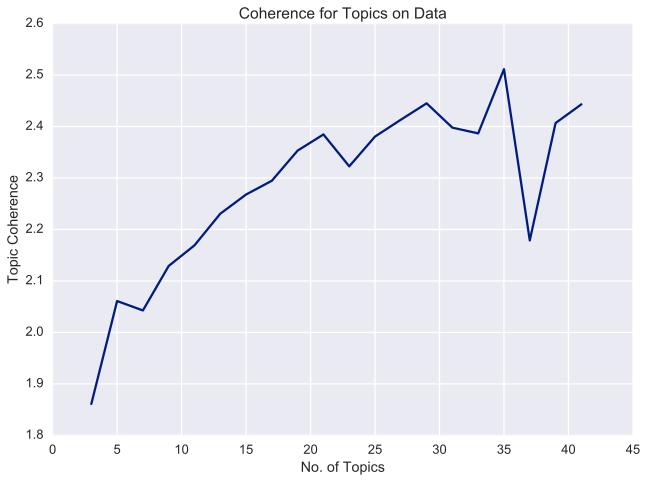

In [292]:
plt.plot(np.arange(3,42,2).tolist(),coherence2)
plt.xlabel('No. of Topics')
plt.ylabel('Topic Coherence')
plt.title('Coherence for Topics on Data')
# plt.axis([0, 6, 0, 20])
plt.show()

In [294]:
lda_op = lda_modeler(cvz,35,500,5)

INFO:lda:n_documents: 172046
INFO:lda:vocab_size: 8026
INFO:lda:n_words: 1544107
INFO:lda:n_topics: 35
INFO:lda:n_iter: 500


Lda model on vector space of (172046, 8026) the topics 35 for iterations 500


INFO:lda:<0> log likelihood: -17421952
INFO:lda:<10> log likelihood: -12945505
INFO:lda:<20> log likelihood: -11585213
INFO:lda:<30> log likelihood: -11189678
INFO:lda:<40> log likelihood: -11018020
INFO:lda:<50> log likelihood: -10932039
INFO:lda:<60> log likelihood: -10876687
INFO:lda:<70> log likelihood: -10844768
INFO:lda:<80> log likelihood: -10823195
INFO:lda:<90> log likelihood: -10806390
INFO:lda:<100> log likelihood: -10793897
INFO:lda:<110> log likelihood: -10786480
INFO:lda:<120> log likelihood: -10776559
INFO:lda:<130> log likelihood: -10773576
INFO:lda:<140> log likelihood: -10770052
INFO:lda:<150> log likelihood: -10765372
INFO:lda:<160> log likelihood: -10760146
INFO:lda:<170> log likelihood: -10758816
INFO:lda:<180> log likelihood: -10755849
INFO:lda:<190> log likelihood: -10754904
INFO:lda:<200> log likelihood: -10754189
INFO:lda:<210> log likelihood: -10752979
INFO:lda:<220> log likelihood: -10754994
INFO:lda:<230> log likelihood: -10752388
INFO:lda:<240> log likeliho

After threshold: 0.5 cutoffs, we have topic space of (54849, 35)
Selected top 5 words. The topic word are listed below!
[['dm', 'account', 'address', 'like', 'number'], ['hope', 'great', 'flight', 'glad', 'enjoy'], ['dm', 'address', 'number', 'phone', 'send'], ['new', 'check', 'danking', 'great', 'mobile'], ['link', 'following', 'hi', 'available', 'information'], ['hi', 'need', 'check', 'able', 'airport'], ['ll', 'time', 'soon', 'sorry', 'patience'], ['want', 'dm', 'way', 'help', 'experience'], ['feedback', 'll', 'team', 'thanks', 'pass'], ['send', 'message', 'direct', 'information', 'account'], ['sorry', 'hi', 'inconvenience', 'caused', 'flight'], ['hi', 'dm', 'address', 'ty', 'log'], ['team', 'customer', 'sorry', 'll', 'baggage'], ['dm', 'send', 'let', 'look', 'going'], ['know', 'let', 'help', 'need', 'assistance'], ['make', 'sure', 'dm', 'want', 'll'], ['hi', 'sorry', 'order', 'thanks', 'ty'], ['sorry', 'hi', 'understand', 'like', 'really'], ['hi', 'store', 'ty', 've', 'hope'], ['ad

In [296]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.5, init='pca',perplexity=10)

# 35-D -> 2-D
tsne_lda = tsne_model.fit_transform(lda_op[3])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 172046 samples in 3.940s...
[t-SNE] Computed neighbors for 172046 samples in 1485.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 172046
[t-SNE] Computed conditional probabilities for sample 2000 / 172046
[t-SNE] Computed conditional probabilities for sample 3000 / 172046
[t-SNE] Computed conditional probabilities for sample 4000 / 172046
[t-SNE] Computed conditional probabilities for sample 5000 / 172046
[t-SNE] Computed conditional probabilities for sample 6000 / 172046
[t-SNE] Computed conditional probabilities for sample 7000 / 172046
[t-SNE] Computed conditional probabilities for sample 8000 / 172046
[t-SNE] Computed conditional probabilities for sample 9000 / 172046
[t-SNE] Computed conditional probabilities for sample 10000 / 172046
[t-SNE] Computed conditional probabilities for sample 11000 / 172046
[t-SNE] Computed conditional probabilities for sample 12000 / 172046
[t-SNE] Computed conditional prob

In [297]:
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5",
    "#1f7874", "#aec777", "#fffeee", "#ffbbbb", "#2caaac",
    "#98dfaa", "#d66666", "#ff9996", "#9499bd", "#c55445",
    "#8c5467", "#c49ccc", "#e33332", "#f77dd2", "#7ffeef",
    "#c7c9d9", "#bc4321", "#dbbbed", "#17bbef", "#9eeea5",
    "#1fc7bb", "#ae8888", "#ffebbe", "#aebf18", "#2caaac",
    "#981f2a", "#d66ee7", "#ff9996", "#91eebd", "#c555d5",
    "#8c321b", "#c4444a", "#eeefff", "#fbbdd2", "#77777f",
    "#c7b7b7", "#bc1222", "#dbae8d", "#17cccf", "#9eddd5",
    "#c7f7f7", "#bace22", "#db818d", "#17bfff", "#9eaaa5"
])

title = '{} groups twitter lda viz'.format(lda_op[3].shape[1])
num_example = len(lda_op[3])

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

plot_lda.circle(x=tsne_lda[:,0], y=tsne_lda[:, 1],
                 color=colormap[lda_op[2]][:num_example]
                 )

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 54849), ('x', 172046), ('y', 172046)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 54849), ('line_color', 54849), ('x', 172046), ('y', 172046)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


GlyphRenderer(id='37b65d89-9e15-4933-b6f4-d136e7633681', ...)

In [299]:
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
topic_coord = np.empty((lda_op[3].shape[1], 2)) * np.nan
for topic_num in lda_op[2]:
    if not np.isnan(topic_coord).any():
        break
    topic_coord[topic_num] = tsne_lda[lda_op[2].index(topic_num)]

# plot crucial words
for i in range(lda_op[3].shape[1]):
    plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [lda_op[0][i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

# save the plot
save(plot_lda, '{}.html'.format(title))

/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/jitins_lab/anaconda2/envs/hyper/lib/python3.6/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/jitins_lab/Documents/experiment/notebooks/Text_Analysis/35 groups twitter lda viz.html'

In [36]:
selected_tweets.head()

,author_id,created_at,text,clean_text,sentiment
480,Tesco,2017-10-31 22:18:58,"@115881 Hi Cade, thanks so much for sending th...",hi cade thanks so much for sending that over i...,0.4404
482,Tesco,2017-10-31 19:47:00,"@115881 Hi Cade, what was my colleagues name? ...",hi cade what was my colleagues name can you gi...,0.0000
558,British_Airways,2017-10-31 22:28:36,@115892 caused. We're unable to offer a compli...,caused we re unable to offer a complimentary u...,0.6597
560,British_Airways,2017-11-01 09:35:44,@115892 Please can you DM us your booking refe...,please can you dm us your booking reference em...,0.6705
565,British_Airways,2017-10-31 22:26:11,@115893 email address and contact telephone nu...,email address and contact telephone number we ...,-0.2263


In [37]:
lda_op[3].shape

(172046, 35)

In [39]:
np.argmax(lda_op[3][:10,],axis=1)

array([ 0,  0,  4, 20, 20, 20, 20, 21,  3, 25])

In [49]:
np.amax(lda_op[3],axis=1).shape

(172046,)

In [47]:
lda_op[0]

['hi', 'store', 'ty', 'thanks', 'sorry']

In [52]:
selected_tweets['topic_num'] = np.argmax(lda_op[3],axis=1)
selected_tweets['topic_propensity'] = np.amax(lda_op[3],axis=1)
selected_tweets['topic_words'] = selected_tweets['topic_num'].apply(lambda x: ' '.join(lda_op[0][x]))
selected_tweets['topic'] = selected_tweets['topic_num'].apply(lambda x: 'topic_{}'.format(x))

In [76]:
selected_tweets.head()

,author_id,created_at,text,clean_text,sentiment,topic_num,topic_propensity,topic_words,topic,positive_sentiment,negative_sentiment,neutral_sentiment,created_date
480,Tesco,2017-10-31 22:18:58,"@115881 Hi Cade, thanks so much for sending th...",hi cade thanks so much for sending that over i...,0.4404,0,0.408000,hi store ty thanks sorry,topic_0,1,0,0,2017-10-31
482,Tesco,2017-10-31 19:47:00,"@115881 Hi Cade, what was my colleagues name? ...",hi cade what was my colleagues name can you gi...,0.0000,0,0.642105,hi store ty thanks sorry,topic_0,0,0,1,2017-10-31
558,British_Airways,2017-10-31 22:28:36,@115892 caused. We're unable to offer a compli...,caused we re unable to offer a complimentary u...,0.6597,4,0.488000,seat change seats ticket offer,topic_4,1,0,0,2017-10-31
560,British_Airways,2017-11-01 09:35:44,@115892 Please can you DM us your booking refe...,please can you dm us your booking reference em...,0.6705,20,0.748148,address email dm number booking,topic_20,1,0,0,2017-11-01
565,British_Airways,2017-10-31 22:26:11,@115893 email address and contact telephone nu...,email address and contact telephone number we ...,-0.2263,20,0.765517,address email dm number booking,topic_20,0,1,0,2017-10-31


In [65]:
selected_tweets['positive_sentiment'] = selected_tweets['sentiment'].apply(lambda x : 1 if x > 0.2 else 0)
selected_tweets['negative_sentiment'] = selected_tweets['sentiment'].apply(lambda x : 1 if x < -0.2 else 0)
selected_tweets['neutral_sentiment'] = selected_tweets['sentiment'].apply(lambda x : 1 if (x <= 0.2) and (x >= -0.2) else 0)

In [69]:
selected_tweets.describe()

,sentiment,topic_num,topic_propensity,positive_sentiment,negative_sentiment,neutral_sentiment
count,172046.000000,172046.000000,172046.000000,172046.000000,172046.000000,172046.000000
mean,0.366382,16.132964,0.433481,0.675232,0.086837,0.237931
std,0.388886,10.095124,0.154148,0.468289,0.281597,0.425818
min,-0.944200,0.000000,0.028571,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.312821,0.000000,0.000000,0.000000
50%,0.421500,16.000000,0.413333,1.000000,0.000000,0.000000
75%,0.690800,25.000000,0.546667,1.000000,0.000000,0.000000
max,0.981800,34.000000,0.888525,1.000000,1.000000,1.000000


In [111]:
brand = pd.unique(selected_tweets.author_id)[2]

In [112]:
brand_data = selected_tweets.loc[selected_tweets.author_id==brand,]
brand_data.shape

(33031, 14)

In [113]:
brand_topic_data = brand_data.loc[brand_data.topic == 'topic_2',]
print(brand_topic_data.shape)
brand_topic_data.head()

(1400, 14)


,author_id,created_at,text,clean_text,sentiment,topic_num,topic_propensity,topic_words,topic,positive_sentiment,negative_sentiment,neutral_sentiment,created_date,created_week
4742,comcastcares,2017-10-31 23:39:15,@117226 I am glad you have reached out. We wil...,i am glad you have reached out we will work on...,0.7450,2,0.168000,ve dm look account help,topic_2,1,0,0,2017-10-31,44
4767,comcastcares,2017-10-28 06:56:06,"@117234 Hello, I apologize if this was sent in...",hello i apologize if this was sent in error ca...,0.0000,2,0.485714,ve dm look account help,topic_2,0,0,1,2017-10-28,43
6027,comcastcares,2017-10-24 18:44:48,Some customers may be experiencing trouble wit...,some customers may be experiencing trouble wit...,0.4588,2,0.264516,ve dm look account help,topic_2,1,0,0,2017-10-24,43
6314,comcastcares,2017-11-01 00:10:27,@117684 I see that you've recently posted abou...,i see that you ve recently posted about your c...,0.0000,2,0.780645,ve dm look account help,topic_2,0,0,1,2017-11-01,44
8955,comcastcares,2017-11-01 01:34:44,@118534 I see that you've recently posted abou...,i see that you ve recently posted about your c...,0.0000,2,0.716129,ve dm look account help,topic_2,0,0,1,2017-11-01,44


In [115]:
agg_brand_topics = brand_topic_data.groupby('created_week',as_index=False).aggregate({'positive_sentiment':np.sum,
                                                                                      'negative_sentiment': np.sum,
                                                                                     'neutral_sentiment': np.sum,
                                                                                     'topic':'count'})
agg_brand_topics['positive_sentiment'] = 100*agg_brand_topics['positive_sentiment']/agg_brand_topics['topic']
agg_brand_topics['negative_sentiment'] = 100*agg_brand_topics['negative_sentiment']/agg_brand_topics['topic']
agg_brand_topics['neutral_sentiment'] = 100*agg_brand_topics['neutral_sentiment']/agg_brand_topics['topic']
agg_brand_topics.head()

,created_week,positive_sentiment,negative_sentiment,neutral_sentiment,topic
0,36,0.000000,100.000000,0.000000,1
1,38,100.000000,0.000000,0.000000,1
2,40,57.303371,7.865169,34.831461,89
3,41,50.467290,12.149533,37.383178,107
4,42,53.846154,10.256410,35.897436,117


In [150]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

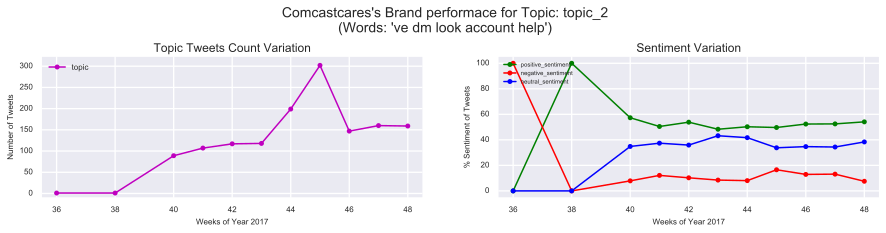

In [197]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (15,3))
plt.suptitle('{}\'s Brand performace for Topic: {} \n(Words: \'{}\') '.format(brand.title(),'topic_2',brand_topic_data.topic_words.values[0,]),fontweight=5,fontsize=14)
plt.title('testing')
plt.subplots_adjust(top=0.75)

plt.subplot(1, 2, 1)
plt.plot(agg_brand_topics.created_week,agg_brand_topics.topic,'mo-',lw=1.5,ms=5)
plt.legend(loc = 2,fontsize = 8)
plt.xlabel('Weeks of Year 2017',fontsize = 8)
plt.ylabel('Number of Tweets',fontsize = 8)
plt.title('Topic Tweets Count Variation',fontsize = 12)
plt.ylim([agg_brand_topics.topic.min()-10,agg_brand_topics.topic.max()+20])
plt.xlim([agg_brand_topics.created_week.min()-0.5,agg_brand_topics.created_week.max()+0.5])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.subplot(1, 2, 2)
plt.plot(agg_brand_topics.created_week,agg_brand_topics.positive_sentiment,'go-',lw=1.5,ms=5)
plt.plot(agg_brand_topics.created_week,agg_brand_topics.negative_sentiment,'ro-',lw=1.5,ms=5)
plt.plot(agg_brand_topics.created_week,agg_brand_topics.neutral_sentiment,'bo-',lw=1.5,ms=5)
plt.legend(loc = 2,fontsize = 6)
plt.title('Sentiment Variation',fontsize = 12)
plt.xlabel('Weeks of Year 2017',fontsize = 8)
plt.ylabel('% Sentiment of Tweets',fontsize = 8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.ylim([-5,105])
plt.xlim([agg_brand_topics.created_week.min()-0.5,agg_brand_topics.created_week.max()+0.5])


plt.show()

In [277]:
# gp = pd.crosstab(selected_tweets['author_id'],selected_tweets['topic']).replace(0,np.nan).stack().reset_index().rename(columns={0:'times'})
# selected_tweets.groupby(['author_id', 'topic']).size().agg(
#     {"code_count": len}).sort_values(
#     "code_count", ascending=False).head(5).reset_index()
# selected_tweets.groupby(['author_id', 'topic'],as_index = False).agg(lambda x : print(x.shape))
gp=selected_tweets.groupby(['author_id'],as_index = False)['topic'].agg(lambda x : ' '.join(x.value_counts().head(5).index.values))

In [283]:
gp.loc[gp.author_id=='Tesco','topic'].values.tolist()[0].split()

['topic_0', 'topic_1', 'topic_12', 'topic_10', 'topic_29']

In [288]:
plt.style.use('seaborn-darkgrid')

def plot_variations(df,brand,topic,words):
    plt.figure(figsize = (15,3))
    plt.suptitle('{}\'s Brand performace for Topic: {} \n(Words: \'{}\') '.format(brand.title(),topic,words),fontweight=5,fontsize=14)
    plt.title('testing')
    plt.subplots_adjust(top=0.75)

    plt.subplot(1, 2, 1)
    plt.plot(df.created_week,df.topic,'mo-',lw=1.5,ms=5)
    plt.legend(loc = 2,fontsize = 8)
    plt.xlabel('Weeks of Year 2017',fontsize = 8)
    plt.ylabel('Number of Tweets',fontsize = 8)
    plt.title('Topic Tweets Count Variation',fontsize = 12)
    plt.ylim([df.topic.min()-20,df.topic.max()+20])
    plt.xlim([df.created_week.min()-0.5,df.created_week.max()+0.5])
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)

    plt.subplot(1, 2, 2)
    plt.plot(df.created_week,df.positive_sentiment,'go-',lw=1.5,ms=5)
    plt.plot(df.created_week,df.negative_sentiment,'ro-',lw=1.5,ms=5)
    plt.plot(df.created_week,df.neutral_sentiment,'bo-',lw=1.5,ms=5)
    plt.legend(loc = 2,fontsize = 6)
    plt.title('Sentiment Variation',fontsize = 12)
    plt.xlabel('Weeks of Year 2017',fontsize = 8)
    plt.ylabel('% Sentiment of Tweets',fontsize = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.ylim([-5,105])
    plt.xlim([df.created_week.min()-0.5,df.created_week.max()+0.5])


    plt.show()

def plot_topics(df,brands=None,topics=None):
    if topics is None:
        topics = 5
    brand_topics = df.groupby(['author_id'],as_index = False)['topic'].agg(lambda x : ' '.join(x.value_counts().head(topics).index.values))
    
    if brands is None:
        for brand in pd.unique(df.author_id):
            brand_data = df.loc[df.author_id==brand,]

            for topic in brand_topics.loc[brand_topics.author_id == brand,'topic'].values.tolist()[0].split():
                brand_topic_data = brand_data.loc[brand_data.topic == topic,]
                words = brand_topic_data.topic_words.values[0,]
                agg_brand_topics = brand_topic_data.groupby('created_week',as_index=False).aggregate({'positive_sentiment':np.sum,
                                                                                      'negative_sentiment': np.sum,
                                                                                     'neutral_sentiment': np.sum,
                                                                                     'topic':'count'})
                agg_brand_topics['positive_sentiment'] = 100*agg_brand_topics['positive_sentiment']/agg_brand_topics['topic']
                agg_brand_topics['negative_sentiment'] = 100*agg_brand_topics['negative_sentiment']/agg_brand_topics['topic']
                agg_brand_topics['neutral_sentiment'] = 100*agg_brand_topics['neutral_sentiment']/agg_brand_topics['topic']
                plot_variations(agg_brand_topics,brand,topic,words)
    else:
        brand_data = df.loc[df.author_id==brand,]
        for topic in brand_topics.loc[brand_topics.author_id == brand,'topic'].values.tolist()[0].split():
            brand_topic_data = brand_data.loc[brand_data.topic == topic,]
            words = brand_topic_data.topic_words.values[0,]
            agg_brand_topics = brand_topic_data.groupby('created_week',as_index=False).aggregate({'positive_sentiment':np.sum,
                                                                                  'negative_sentiment': np.sum,
                                                                                 'neutral_sentiment': np.sum,
                                                                                 'topic':'count'})
            agg_brand_topics['positive_sentiment'] = 100*agg_brand_topics['positive_sentiment']/agg_brand_topics['topic']
            agg_brand_topics['negative_sentiment'] = 100*agg_brand_topics['negative_sentiment']/agg_brand_topics['topic']
            agg_brand_topics['neutral_sentiment'] = 100*agg_brand_topics['neutral_sentiment']/agg_brand_topics['topic']
            plot_variations(agg_brand_topics,brand,topic,words)
    

In [304]:
pd.to_datetime('2017-08-01').date()

datetime.date(2017, 8, 1)

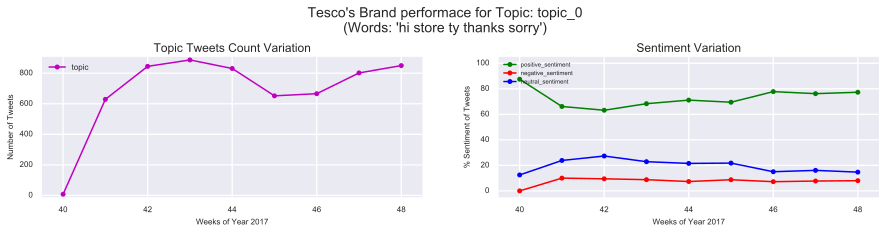

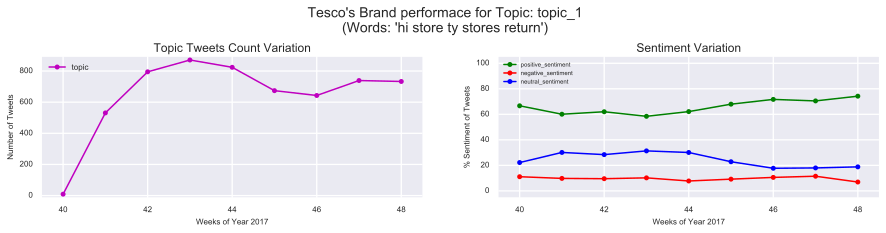

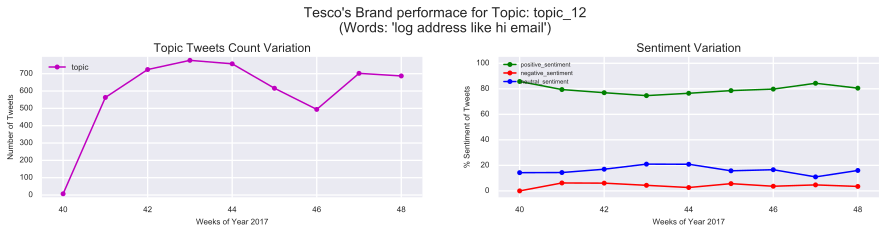

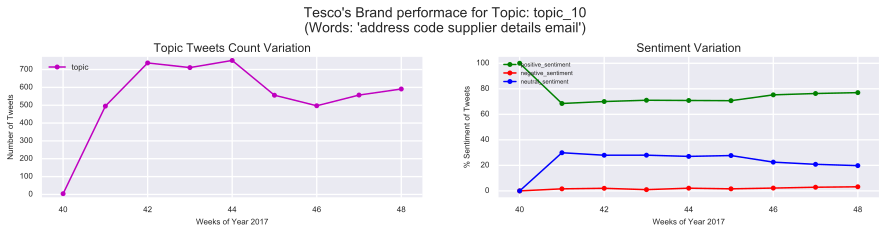

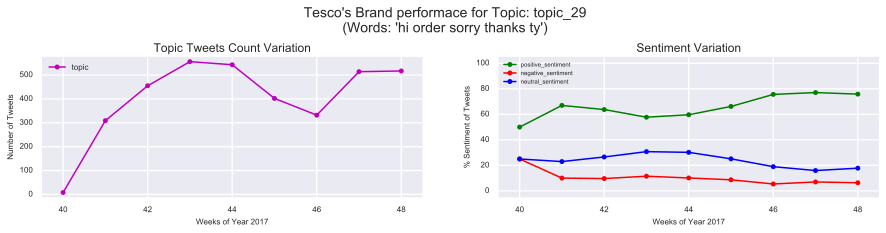

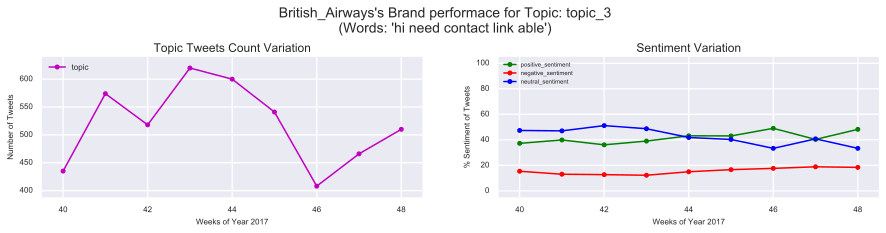

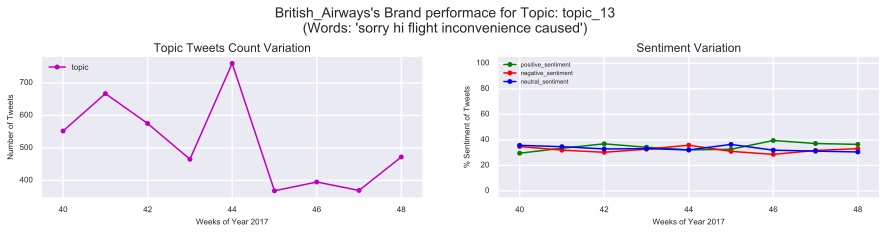

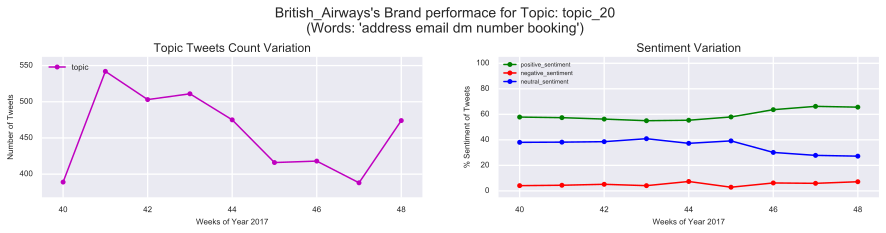

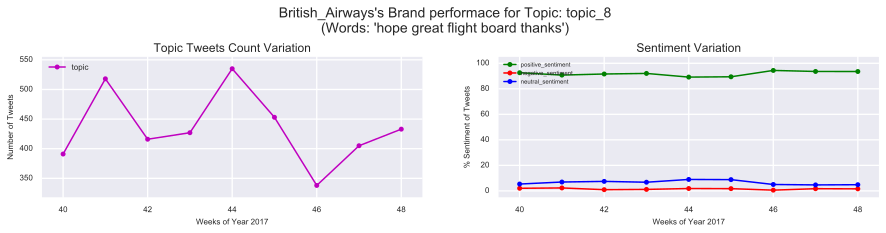

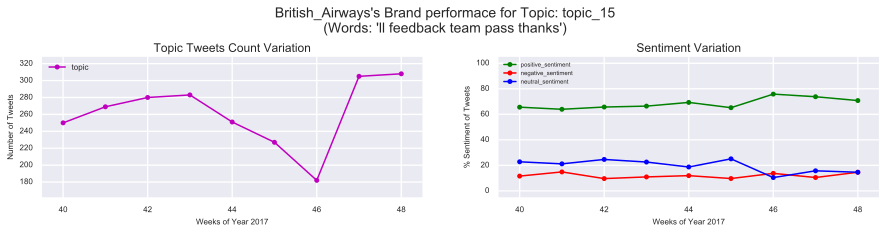

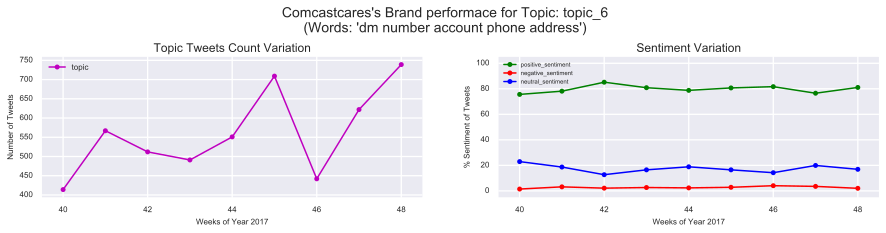

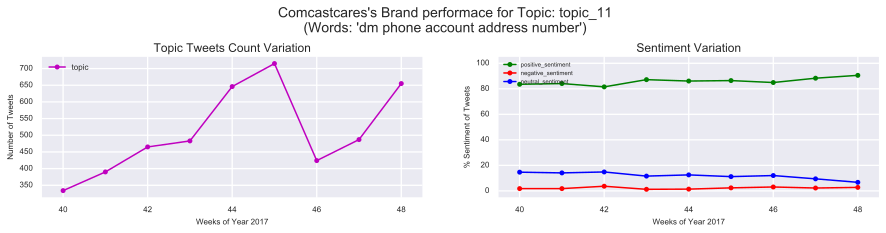

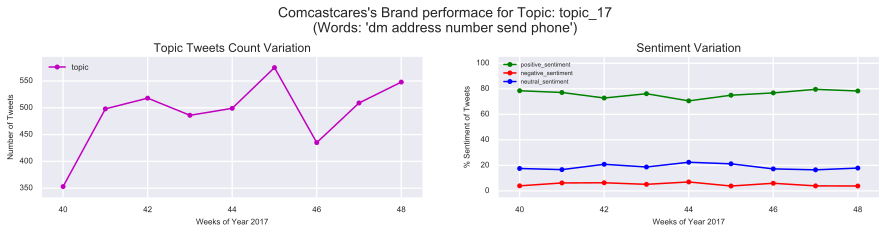

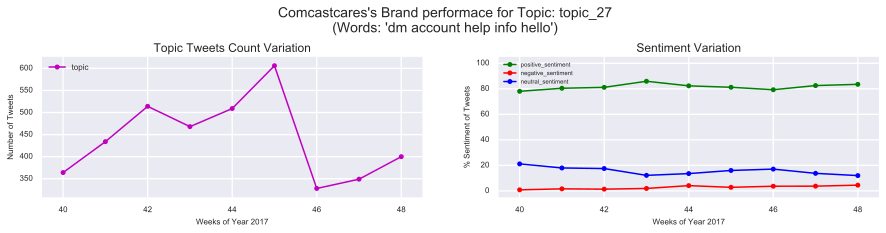

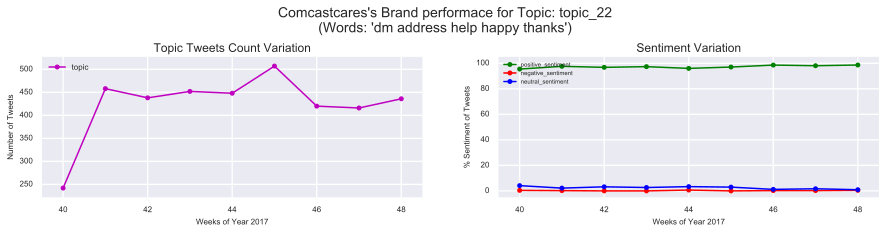

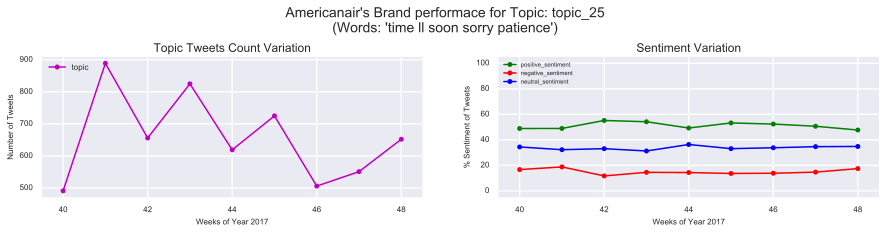

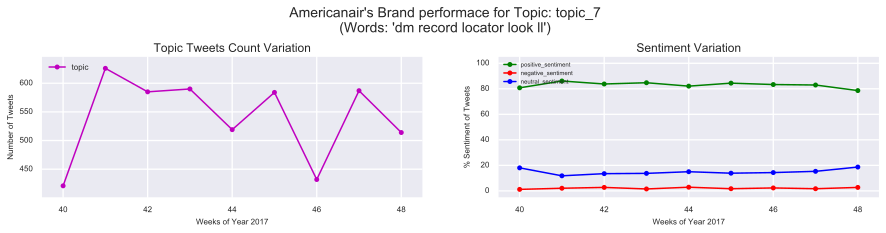

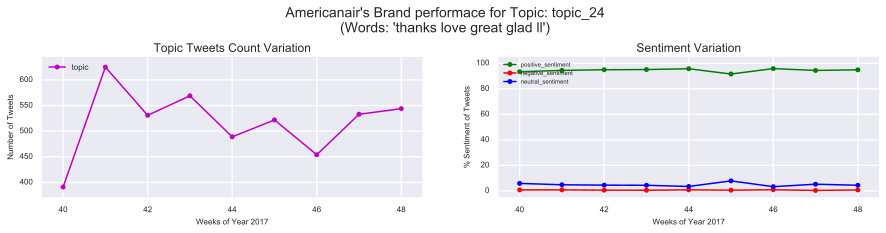

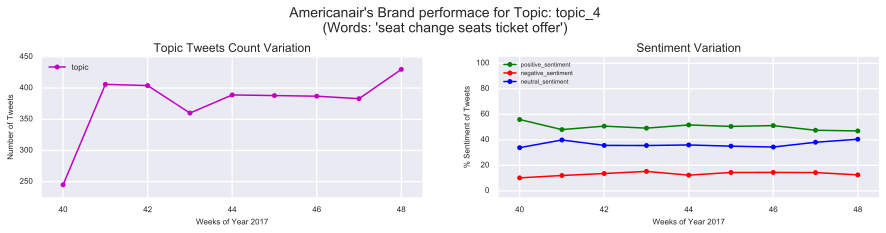

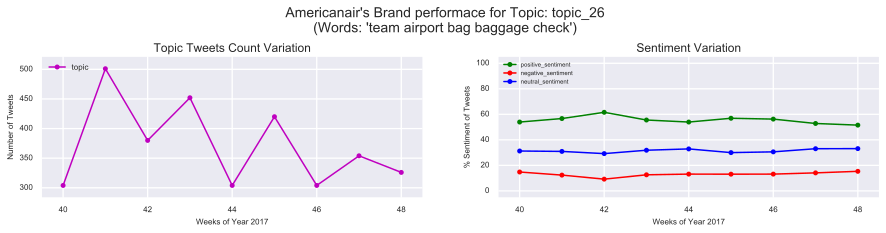

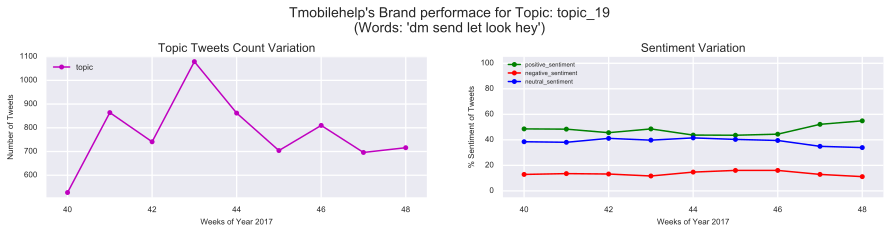

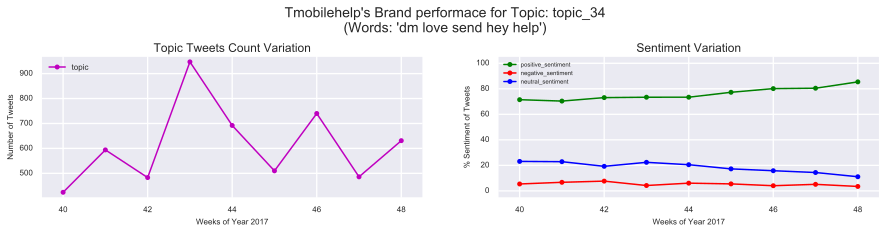

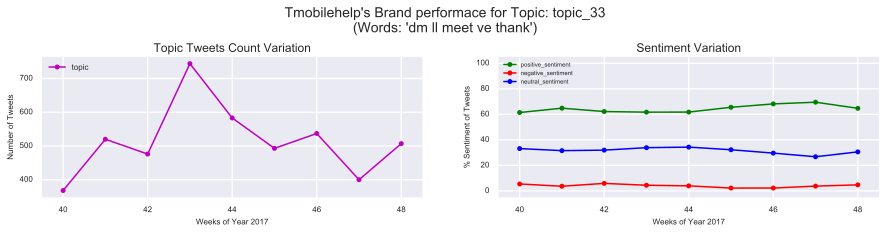

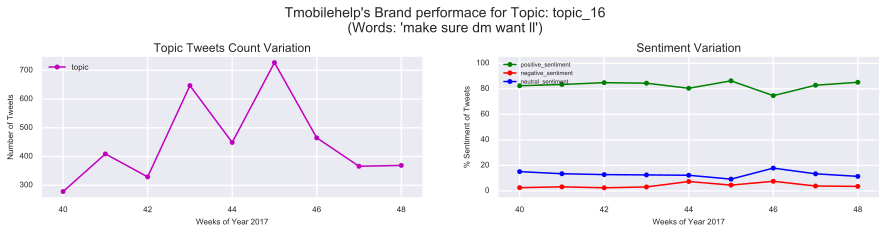

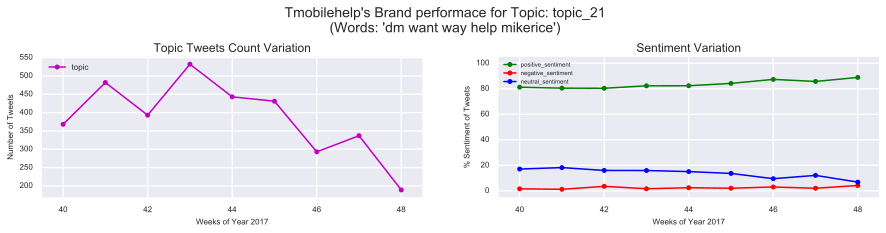

In [307]:
plot_topics(selected_tweets.loc[selected_tweets.created_date > pd.to_datetime('2017-10-01').date(),])